# Plot correlation function
This notebook is based on `correlation_function.py` that will produce the `.npz` file that is used here

In [11]:
%load_ext autoreload
%autoreload 2

from plot_correlations_from_npz import *
%config InlineBackend.figure_format ='retina'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Reading files

In [12]:
input_dir = "../../experimental_data/data_dany/data_dany_output_20220614/"
# input_dir = "../../experimental_data/data_dany/corr_tests/"

mk_missing_dir(os.path.join(input_dir, "plots/correlations"))

corralations_filenames = get_input_files(input_dir, keyword="correlations", ext=".npz")

# # Filter if wanted
# corralations_filenames = [cf for cf in corralations_filenames if not "glucoseaa" in cf]

conditions = ["acetate", "glycerol", "glucose", "glucoseaa"]
promoters = ['hi1', 'hi3', 'med2', 'med3', 'rrnB', 'rpsB', 'rpmB', 'rplN']

corr_dict = {}
gamma_lambdas = {}
mean_lambdas = {}
mean_qs = {}
gamma_qs = {}
mean_sq_conc = {}

for cf in corralations_filenames:
    data = np.load(cf, allow_pickle=True)

    data_set_name = re.split('_f\d', cf.split('/')[-1] )[0]
    print(data_set_name, end="\t") 

    corr_dict[data_set_name] = Correlation_function(data['correlations'])
    
    # Collect relevant parameters 
    gamma_lambdas[data_set_name] = data['gamma_lambda']
    mean_lambdas[data_set_name] = data['mean_lambda']
    
    gamma_qs[data_set_name] = data['gamma_q']
    mean_qs[data_set_name] = data['mean_q']
    
    prediction_file = cf.replace("correlations.npz", "prediction.csv")
    cells = df2ggp_cells(pd.read_csv(prediction_file, skiprows=header_lines(prediction_file), 
                                 dtype={"parent_id":str, "cell_id":str}))
    
    mean_sq_conc[data_set_name] = mean_quantity(cells)**2
    

acetate_hi1	acetate_hi3	acetate_med2	acetate_med3	acetate_rplN	acetate_rpmB	acetate_rpsB	acetate_rrnB	glucose_hi1	glucose_hi3	glucose_med2	glucose_med3	glucose_rplN	glucose_rpmB	glucose_rpsB	glucose_rrnB	glucoseaa_hi1	glucoseaa_hi3	glucoseaa_med2	glucoseaa_med3	glucoseaa_rplN	glucoseaa_rpmB	glucoseaa_rpsB	glucoseaa_rrnB	glycerol_hi1	glycerol_hi3	glycerol_med2	glycerol_med3	glycerol_rplN	glycerol_rpmB	glycerol_rpsB	glycerol_rrnB	

In [13]:
corr_dict = sort_dict(corr_dict, ["acetate", "glycerol", "glucose", "glucoseaa"])
gamma_lambdas = sort_dict(gamma_lambdas, ["acetate", "glycerol", "glucose", "glucoseaa"])
gamma_qs = sort_dict(gamma_qs, ["acetate", "glycerol", "glucose", "glucoseaa"])
mean_lambdas = sort_dict(mean_lambdas, ["acetate", "glycerol", "glucose", "glucoseaa"])

### Growth rate by condition

In [14]:
for condition in conditions:
    plot_dir = os.path.join(input_dir, "plots/correlations/", condition ,"{:s}_{:s}_{:s}_{:s}.pdf")
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, condition), 
                                "c(t+dt)", "c(t)", 
                                plot_file=plot_dir.format(condition, "corr", "c", "c"), 
                                label=get_filtered_keys(corr_dict, condition), 
                                mean_lambda = get_filtered_values(mean_lambdas, condition),
                                scale_t=True, 
#                                 ylim=[-0.1, 1.1], 
                                xlim=[0, 7], 
                                err_style="fill", 
                                log=False, 
                                min_joint_number=1)

Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/acetate/acetate_corr_c_c.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glycerol/glycerol_corr_c_c.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glucose/glucose_corr_c_c.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glucoseaa/glucoseaa_corr_c_c.pdf


In [21]:


%load_ext autoreload
%autoreload 2

from plot_correlations_from_npz import *

for promoter in promoters[:]:
    plot_dir = os.path.join(input_dir, "plots/correlations/", promoter ,"{:s}_{:s}_{:s}_{:s}.pdf")
    mk_missing_dir( os.path.join(input_dir, "plots/correlations/", promoter))
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
                            "l(t+dt)", "l(t)", 
                            plot_file=plot_dir.format(promoter, "corr", "l", "l"), 
                            label=get_filtered_keys(corr_dict, promoter, keep="condition"), 
                            gamma=get_filtered_values(gamma_lambdas, promoter), 
                            mean_lambda = get_filtered_values(mean_lambdas, promoter),
                            ylabel=r"Correlation $\lambda(t+dt),\lambda(t)$",
                            scale_t=True, 
                            ylim=[2e-2, 1.5], 
                            xlim=[0, 2], 
                            err_style="fill", 
                            log=True, 
                            min_joint_number=1)
    
#     plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
#                             "l(t+dt)", "l(t)", 
#                             plot_file=plot_dir.format(promoter, "corr_real_time", "l", "l"), 
#                             label=get_filtered_keys(corr_dict, promoter, keep="condition"), 
#                             gamma=get_filtered_values(gamma_lambdas, promoter), 
#                             mean_lambda = get_filtered_values(mean_lambdas, promoter),
#                             ylabel=r"Correlation $\lambda(t+dt),\lambda(t)$",
#                             scale_t=False, 
#                             ylim=[0.01, 1], 
#                             xlim=[0, 200], 
#                             err_style="fill", 
#                             log=True, 
#                             min_joint_number=2000)
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
                            "l(t+dt)", "l(t)", 
                            plot_file=plot_dir.format(promoter, "cov", "l", "l"), 
                            label=get_filtered_keys(corr_dict, promoter, keep="condition"), 
                            gamma=get_filtered_values(gamma_lambdas, promoter), 
                            mean_lambda = get_filtered_values(mean_lambdas, promoter),
                            normalize = get_filtered_values(mean_lambdas, promoter)**2,
                            ylabel=r"Norm. covariance $\lambda(t+dt),\lambda(t)/\bar{\lambda}^2$",
                            scale_t=True, 
                            ylim=[1e-3, 0.2], 
                            xlim=[0, 2], 
                            err_style="fill", 
                            log=True, 
                            min_joint_number=1, 
                            cov=True)
    
#     plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
#                             "l(t+dt)", "q(t)", 
#                             plot_file=plot_dir.format(promoter, "corr", "l", "q"), 
#                             label=get_filtered_keys(corr_dict, promoter, keep="both"), 
#                             mean_lambda = get_filtered_values(mean_lambdas, promoter),
#                             ylabel=r"Correlation $\lambda(t+dt),q(t)$",
#                             scale_t=True, 
#                             ylim=[-0.25, 0.55], 
#                             xlim=[-2, 2], 
#                             err_style="fill", 
# #                             log=True, 
#                             min_joint_number=1,
#                             highlight_x0=True,
#                             highlight_y0=True,)
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
                            "q(t+dt)", "l(t)", 
                            plot_file=plot_dir.format(promoter, "corr", "q", "l"), 
                            label=get_filtered_keys(corr_dict, promoter, keep="both"), 
                            mean_lambda = get_filtered_values(mean_lambdas, promoter),
                            ylabel=r"Correlation $q(t+dt),\lambda(t)$",
                            scale_t=True, 
                            ylim=[-0.25, 0.75], 
                            xlim=[-2, 2], 
                            err_style="fill", 
#                             log=True, 
                            min_joint_number=1,
                            highlight_x0=True,
                            highlight_y0=True,)
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
                            "q(t+dt)", "q(t)", 
                            plot_file=plot_dir.format(promoter, "corr", "q", "q"), 
                            label=get_filtered_keys(corr_dict, promoter, keep="both"), 
#                             gamma=get_filtered_values(gamma_qs, promoter), 
                            mean_lambda = get_filtered_values(mean_lambdas, promoter),
                            ylabel=r"Correlation $q(t+dt),q(t)$",
                            scale_t=True, 
#                             ylim=[1e-3, 1], 
                            xlim=[0, 2], 
                            err_style="fill", 
#                             log=True, 
                            min_joint_number=1, 
                            highlight_x0=True)
    
#     plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
#                             "q(t+dt)", "q(t)", 
#                             plot_file=plot_dir.format(promoter, "corr_real_time", "q", "q"), 
#                             label=get_filtered_keys(corr_dict, promoter, keep="both"), 
# #                             gamma=get_filtered_values(gamma_qs, promoter), 
#                             mean_lambda = get_filtered_values(mean_lambdas, promoter),
#                             ylabel=r"Correlation $q(t+dt),q(t)$",
# #                             scale_t=True, 
# #                             ylim=[1e-3, 1], 
#                             xlim=[0, 200], 
#                             err_style="fill", 
# #                             log=True, 
#                             min_joint_number=1, 
#                             highlight_x0=True)
        
    plot_xy_correlation_list(get_filtered_values(corr_dict, promoter), 
                            "q(t+dt)", "q(t)", 
                            plot_file=plot_dir.format(promoter, "cov", "q", "q"), 
                            label=get_filtered_keys(corr_dict, promoter, keep="both"), 
#                             gamma=get_filtered_values(gamma_qs, promoter), 
                            mean_lambda = get_filtered_values(mean_lambdas, promoter),
                             normalize = get_filtered_values(mean_qs, promoter)**2,
                            ylabel=r"Norm. covariance $q(t+dt),q(t) /\bar{q}^2$",
                            scale_t=True, 
#                             ylim=[1e1, 1e4], 
                            xlim=[0, 2], 
                            err_style="fill", 
                            log=False, 
                            min_joint_number=1, 
                            cov=True, 
                            highlight_x0=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi1/hi1_corr_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi1/hi1_cov_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi1/hi1_corr_q_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi1/hi1_corr_q_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi1/hi1_cov_q_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi3/hi3_corr_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi3/hi3_cov_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/hi3/hi3_corr_q_l.pdf
Saved in ../../experimental_data/data_dany/

/Users/bjoern/mother_machine/gfp_gaussian_process/python_src/plot_correlations_from_npz.py:532: RuntimeWarning: overflow encountered in exp
  dts=dts[dt_filter]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/rplN/rplN_corr_l_l.pdf


/Users/bjoern/mother_machine/gfp_gaussian_process/python_src/plot_correlations_from_npz.py:532: RuntimeWarning: overflow encountered in exp
  dts=dts[dt_filter]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/rplN/rplN_cov_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/rplN/rplN_corr_q_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/rplN/rplN_corr_q_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/rplN/rplN_cov_q_q.pdf


In [16]:
for condition, xmax, ymin in zip(conditions, [2, 2, 2, 2], [0.002, 0.002, 0.002, 0.002]):
    
    plot_dir = os.path.join(input_dir, "plots/correlations/", condition ,"{:s}_{:s}_{:s}_{:s}.pdf")
    mk_missing_dir( os.path.join(input_dir, "plots/correlations/", condition))
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, condition), 
                                "l(t+dt)", "l(t)", 
                                plot_file=plot_dir.format(condition, "corr", "l", "l"), 
                                label=get_filtered_keys(corr_dict, condition, "both"), 
                                gamma=get_filtered_values(gamma_lambdas, condition), 
                                mean_lambda = get_filtered_values(mean_lambdas, condition),
                                scale_t=True, 
                                ylim=[0.002, 1.1], 
                                xlim=[0, 2], 
                                ylabel=r"Correlation$(\lambda(t+dt),\lambda(t))$",
                                err_style="fill", 
                                log=True,  
                                min_joint_number=1, 
                                fit=False)
    
    
    
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, condition), 
                                "q(t+dt)", "q(t)", 
                                plot_file=plot_dir.format(condition, "corr", "q", "q"), 
                                label=get_filtered_keys(corr_dict, condition, "both"), 
#                                 gamma=get_filtered_values(gamma_qs, condition), 
                                mean_lambda = get_filtered_values(mean_lambdas, condition),
                                scale_t=True, 
                                ylim=[-0.2, 1.1], 
                                xlim=[0, 1], 
                                ylabel=r"Correlation$(q(t+dt),q(t))$",
                                err_style="fill", 
                                log=False, 
                                min_joint_number=1, 
                                fit=False)
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, condition), 
                                "q(t+dt)", "l(t)", 
                                plot_file=plot_dir.format(condition, "corr", "q", "l"), 
                                label=get_filtered_keys(corr_dict, condition, "both"), 
#                                 gamma=get_filtered_values(gamma_qs, condition), 
                                mean_lambda = get_filtered_values(mean_lambdas, condition),
                                scale_t=True, 
                                ylim=[-0.4,0.5], 
                                xlim=[0, 1], 
                                ylabel=r"Correlation$(q(t+dt),l(t))$",
                                err_style="fill", 
                                log=False, 
                                min_joint_number=1, 
                                fit=False)
    plot_xy_correlation_list(get_filtered_values(corr_dict, condition), 
                                "l(t+dt)", "q(t)", 
                                plot_file=plot_dir.format(condition, "corr", "l", "q"), 
                                label=get_filtered_keys(corr_dict, condition, "both"), 
#                                 gamma=get_filtered_values(gamma_qs, condition), 
                                mean_lambda = get_filtered_values(mean_lambdas, condition),
                                scale_t=True, 
                                ylim=[-0.4, 0.4], 
                                xlim=[0, 1], 
                                ylabel=r"Correlation$(l(t+dt),q(t))$",
                                err_style="fill", 
                                log=False, 
                                min_joint_number=1, 
                                fit=False)
    
    plot_xy_correlation_list(get_filtered_values(corr_dict, condition), 
                                "c(t+dt)", "c(t)", 
                                plot_file=plot_dir.format(condition, "corr", "c", "c"), 
                                label=get_filtered_keys(corr_dict, condition, "both"), 
                                gamma=[], 
                                mean_lambda = get_filtered_values(mean_lambdas, condition),
                                scale_t=True, 
                                ylim=[-0.2, 1.1], 
                                xlim=[0, 2], 
                                ylabel=r"Correlation$(c(t+dt),c(t))$",
                                err_style="fill", 
                                log=False, 
                                min_joint_number=1, 
                                fit=False)

Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/acetate/acetate_corr_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/acetate/acetate_corr_q_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/acetate/acetate_corr_q_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/acetate/acetate_corr_l_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/acetate/acetate_corr_c_c.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glycerol/glycerol_corr_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glycerol/glycerol_corr_q_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glycerol/glycerol_corr_q_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_outpu

/Users/bjoern/mother_machine/gfp_gaussian_process/python_src/plot_correlations_from_npz.py:532: RuntimeWarning: overflow encountered in exp
  dts=dts[dt_filter]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glucoseaa/glucoseaa_corr_l_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glucoseaa/glucoseaa_corr_q_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glucoseaa/glucoseaa_corr_q_l.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glucoseaa/glucoseaa_corr_l_q.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/glucoseaa/glucoseaa_corr_c_c.pdf


## Tiles

Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_hi1_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_hi3_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_med2_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_med3_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_rplN_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_rpmB_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_rpsB_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_acetate_rrnB_tiles_.pdf
Saved in ../../exp

/Users/bjoern/mother_machine/gfp_gaussian_process/python_src/plot_correlations_from_npz.py:220: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucose_rplN_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucose_rpmB_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucose_rpsB_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucose_rrnB_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucoseaa_hi1_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucoseaa_hi3_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucoseaa_med2_tiles_.pdf
Saved in ../../experimental_data/data_dany/data_dany_output_20220614/plots/correlations/tiles/corr_glucoseaa_med3_tiles_.pdf
Saved in .

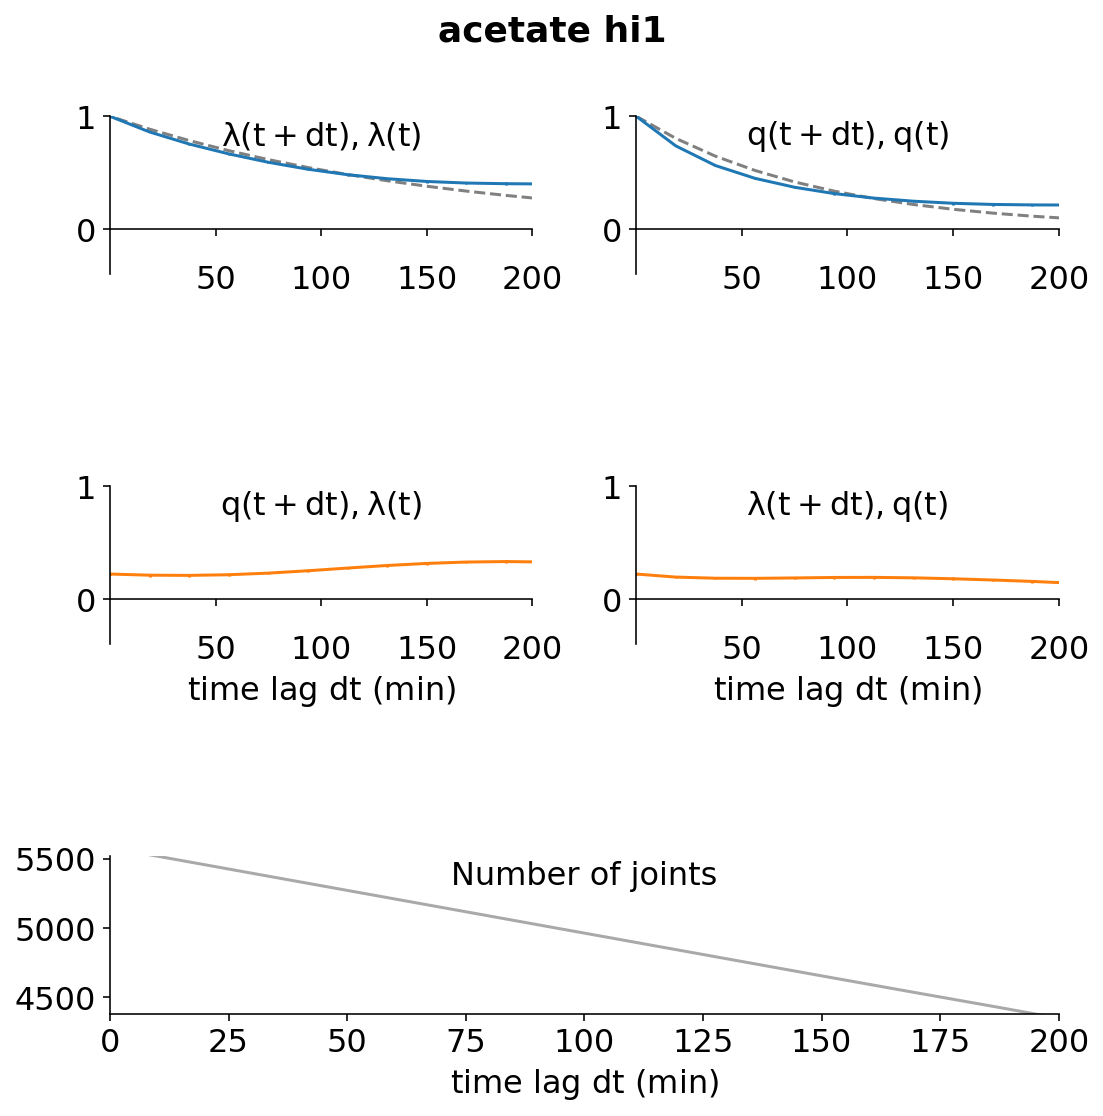

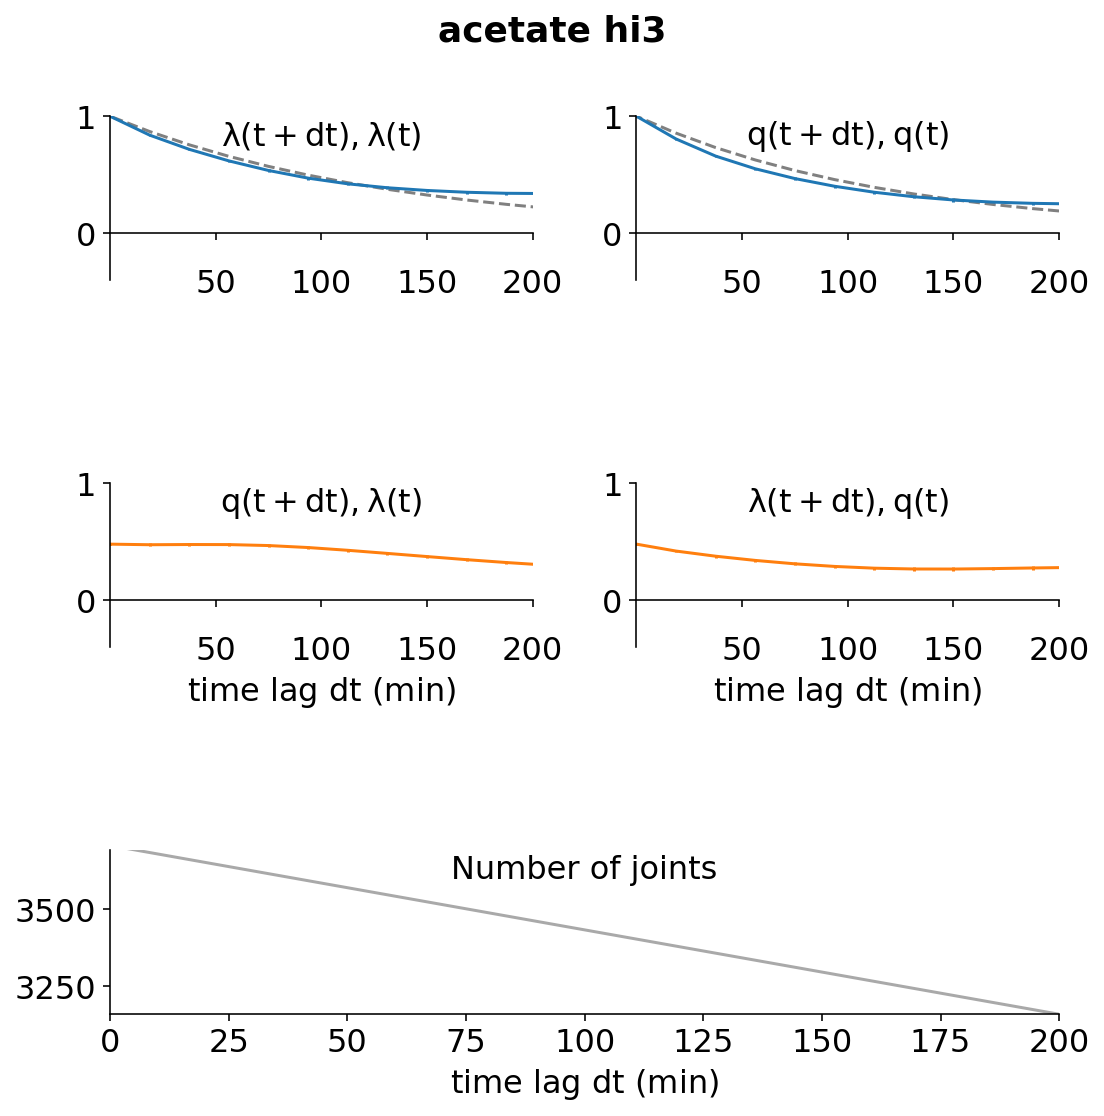

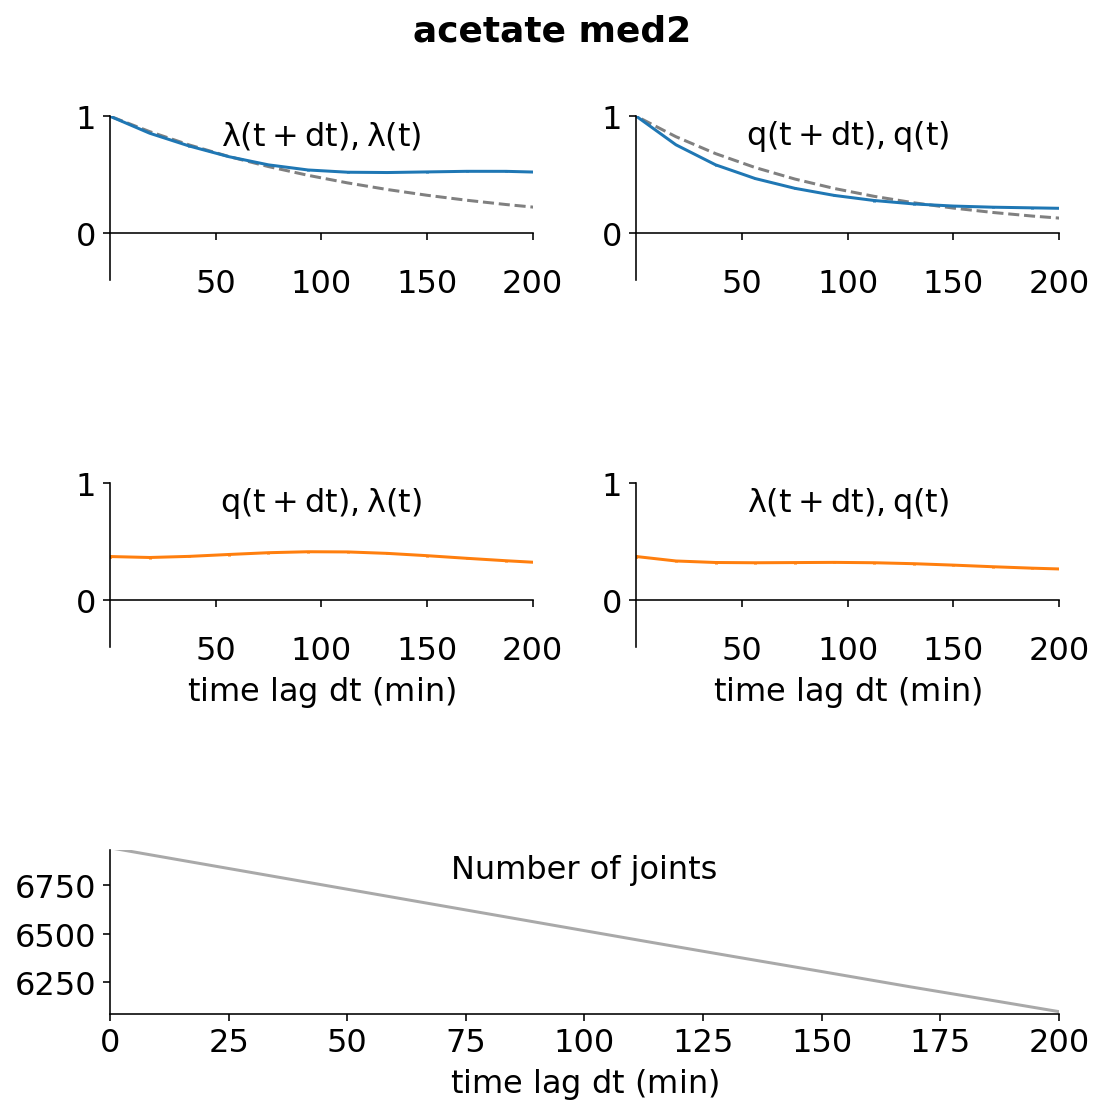

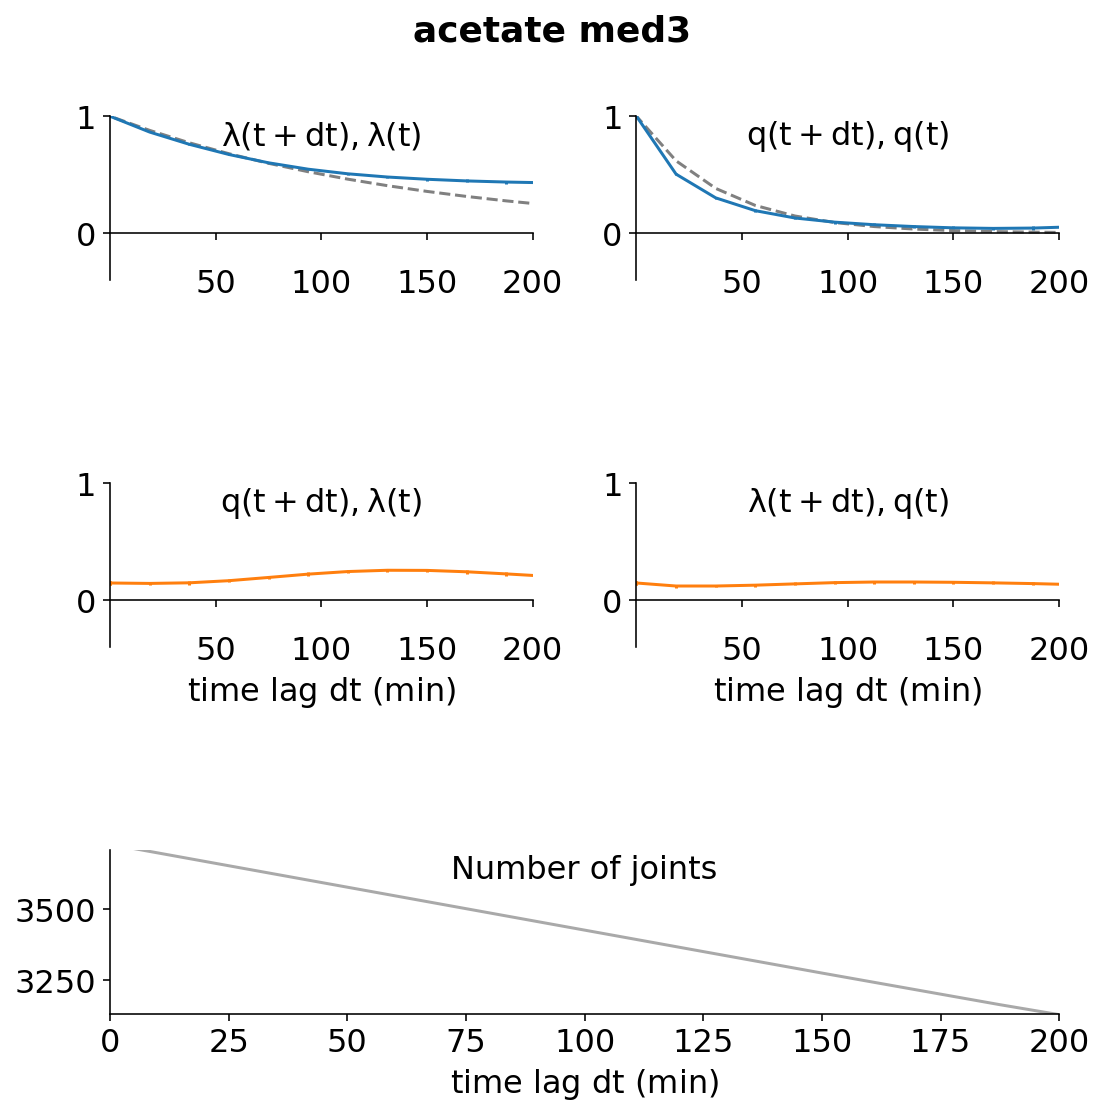

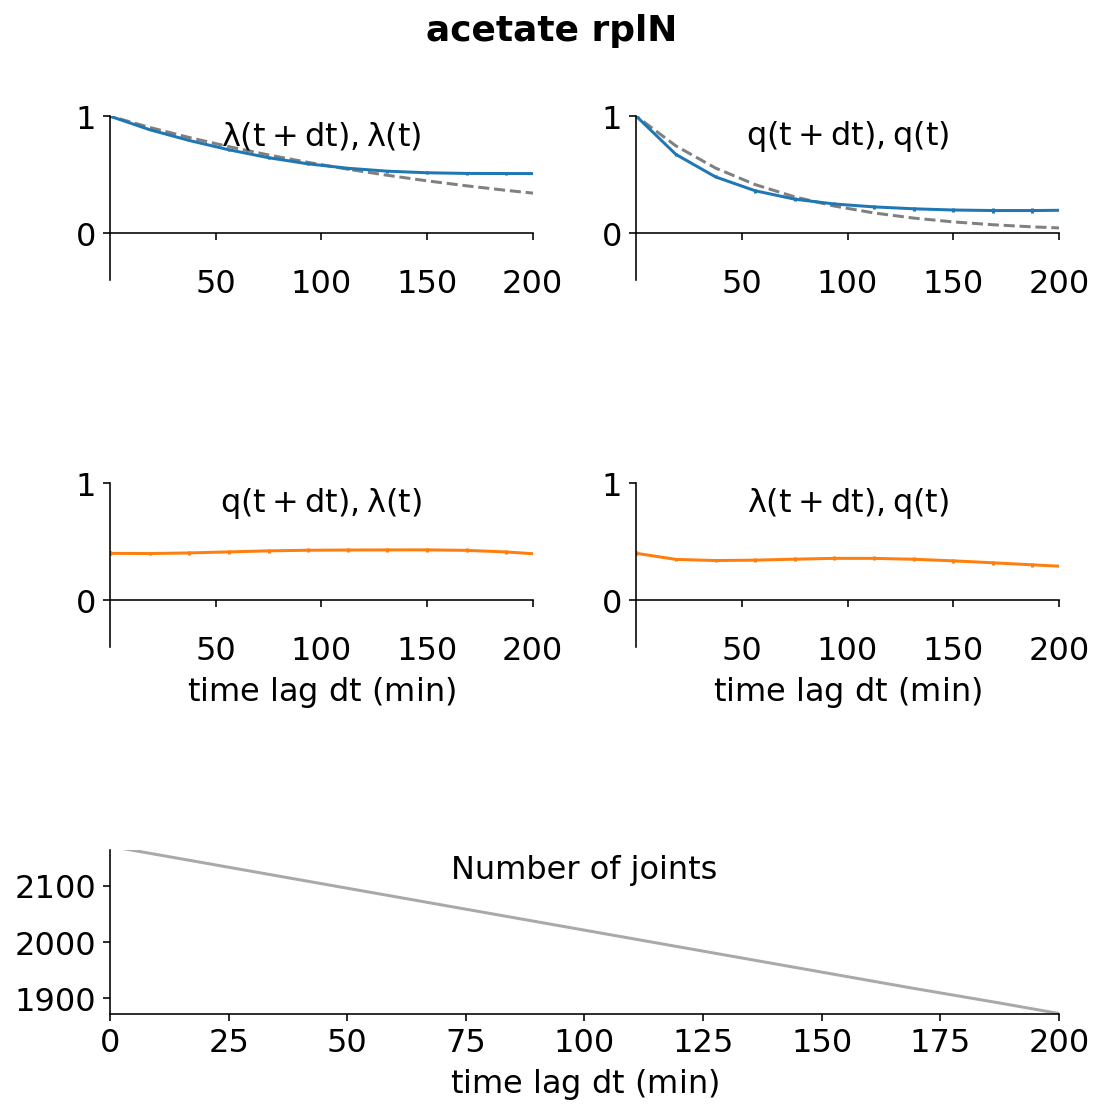

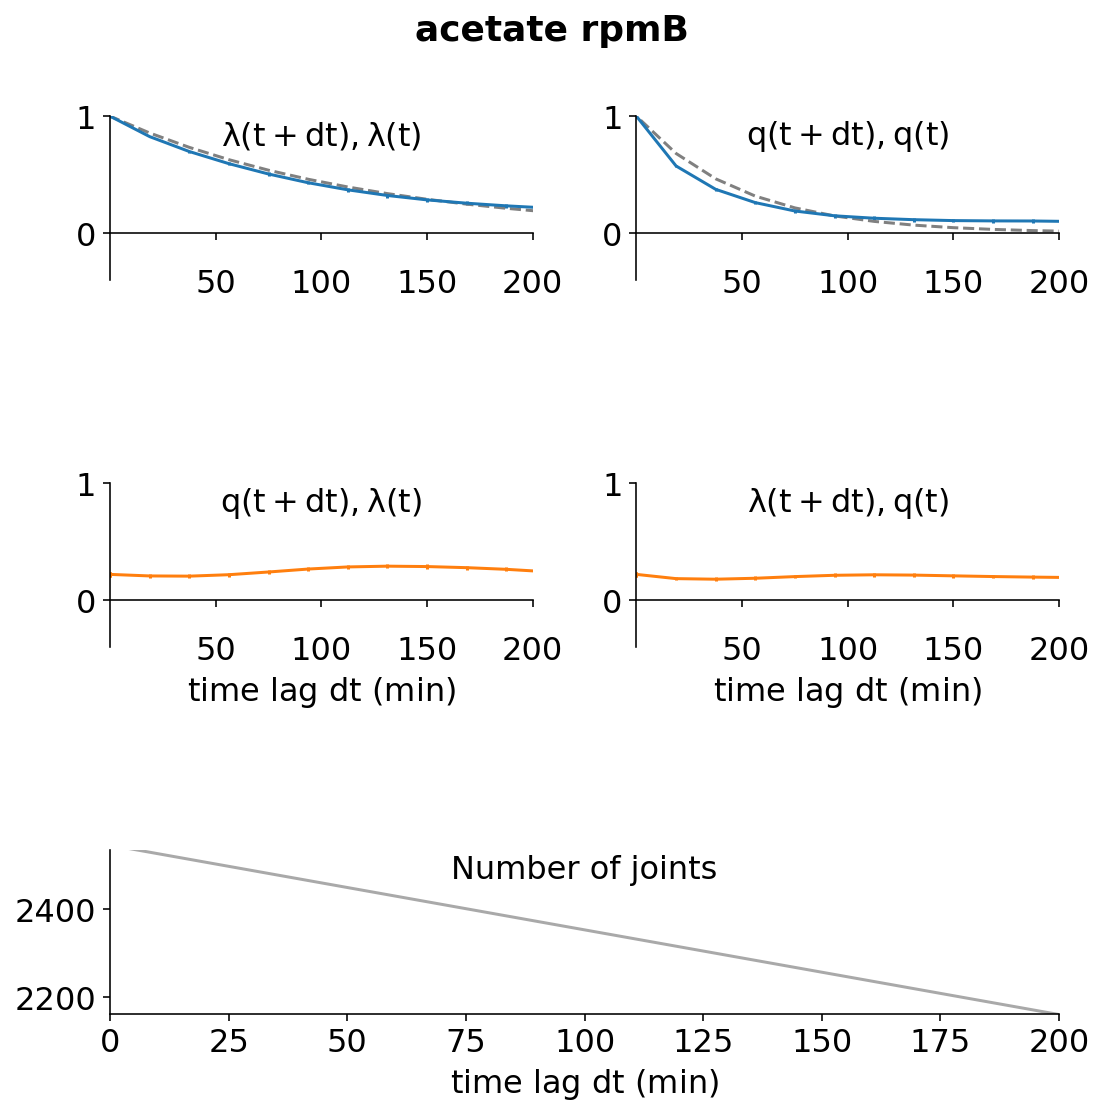

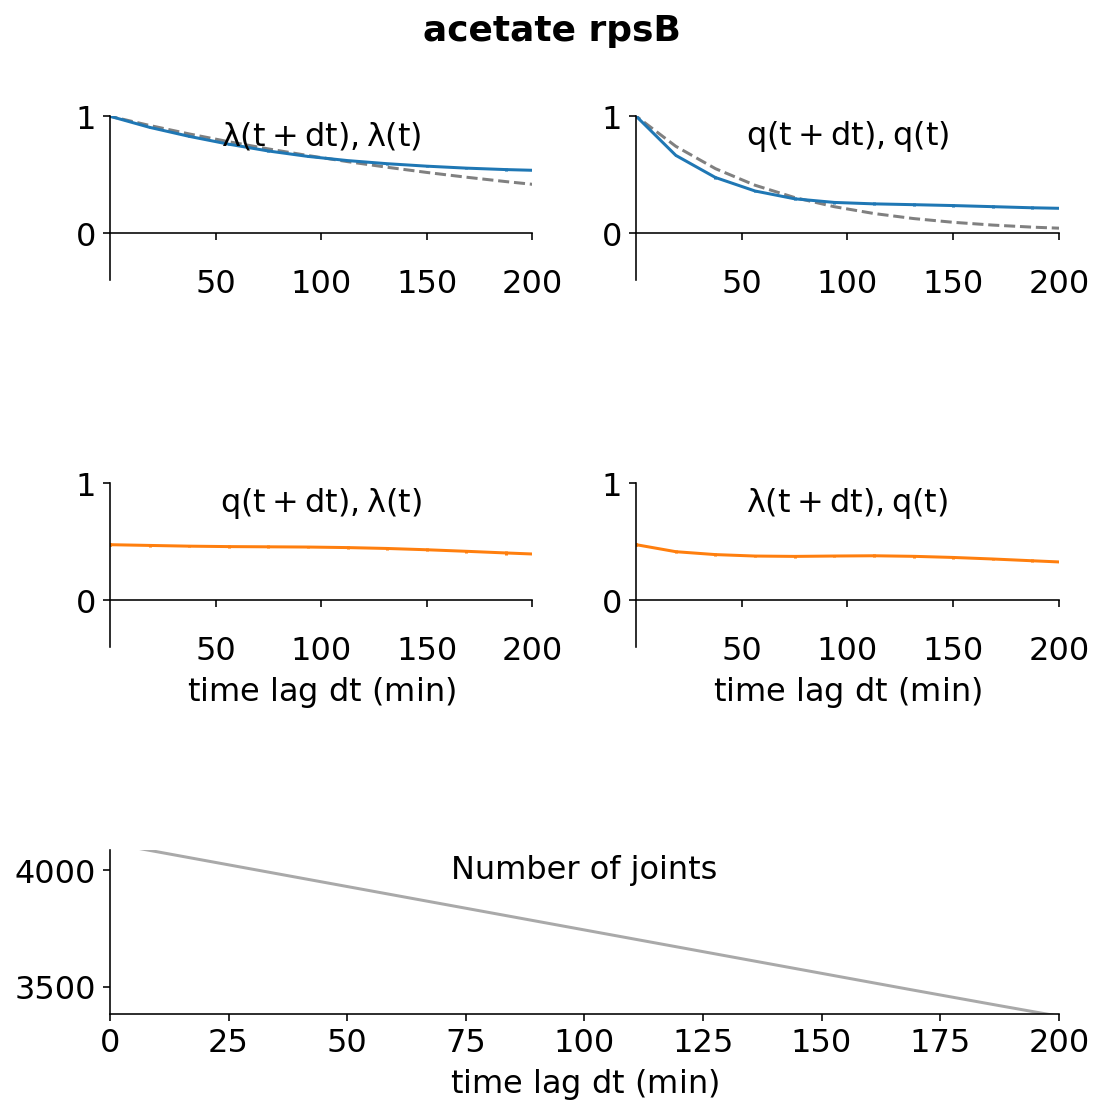

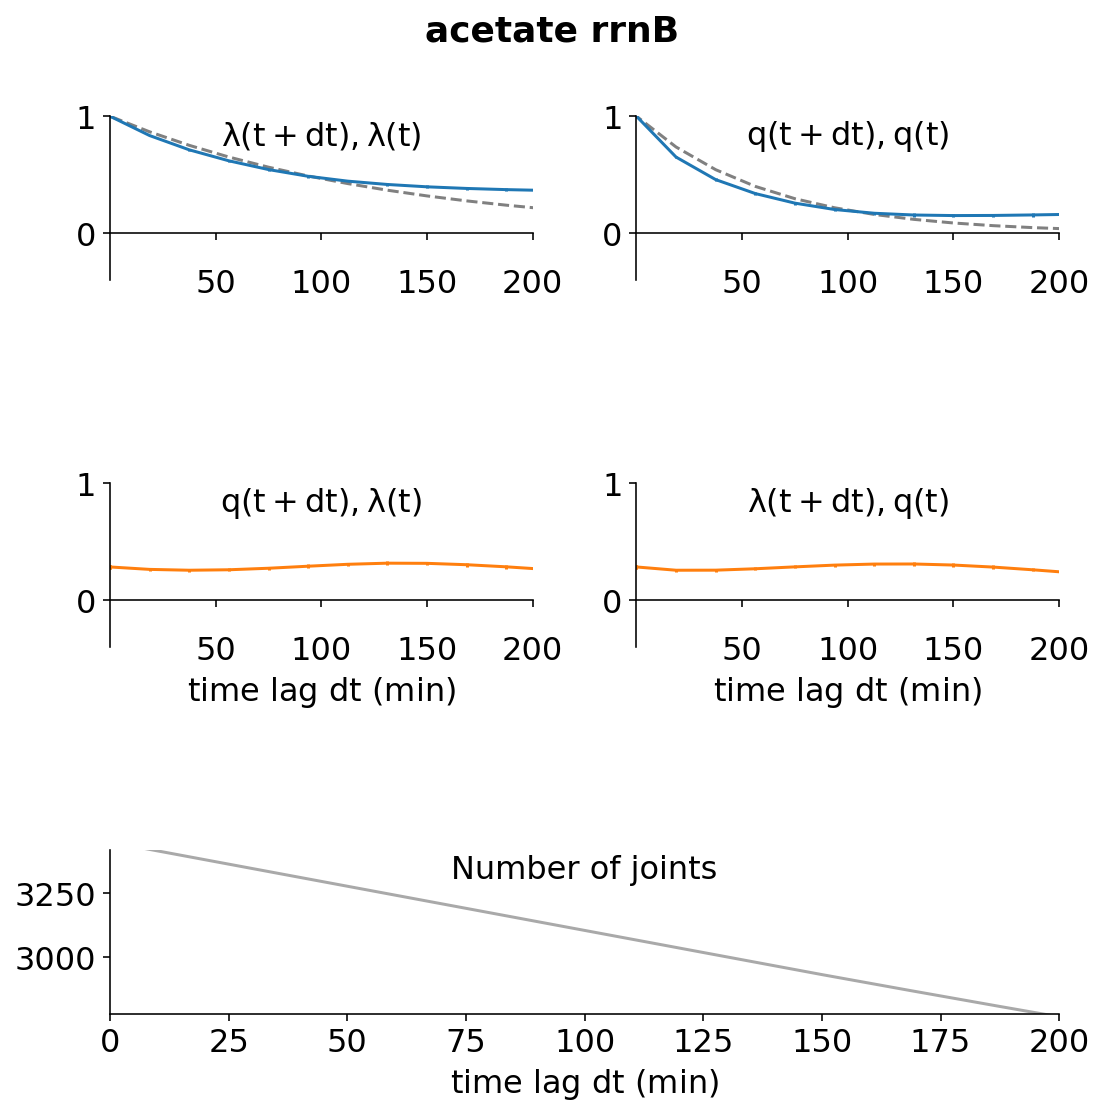

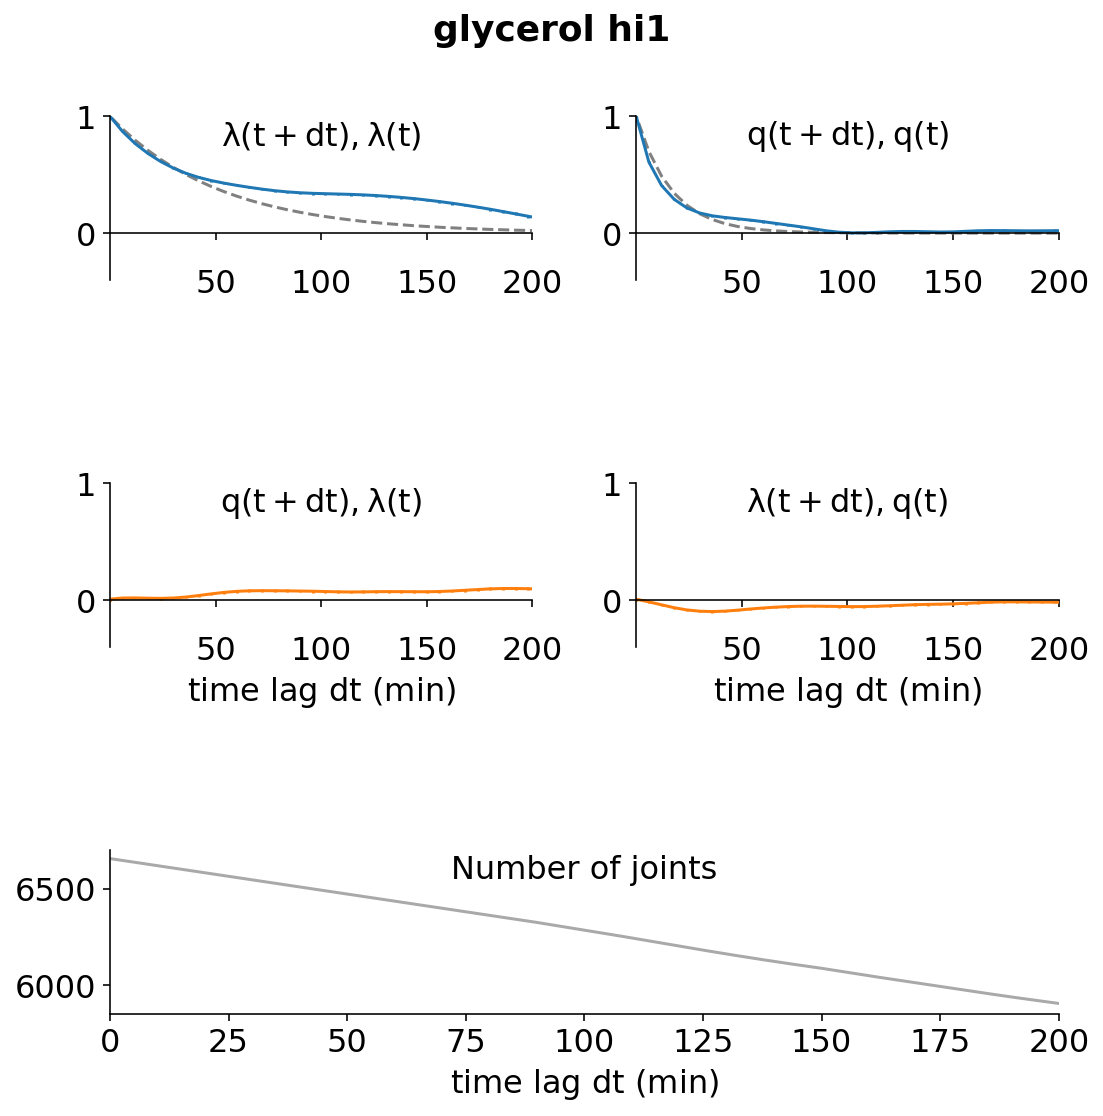

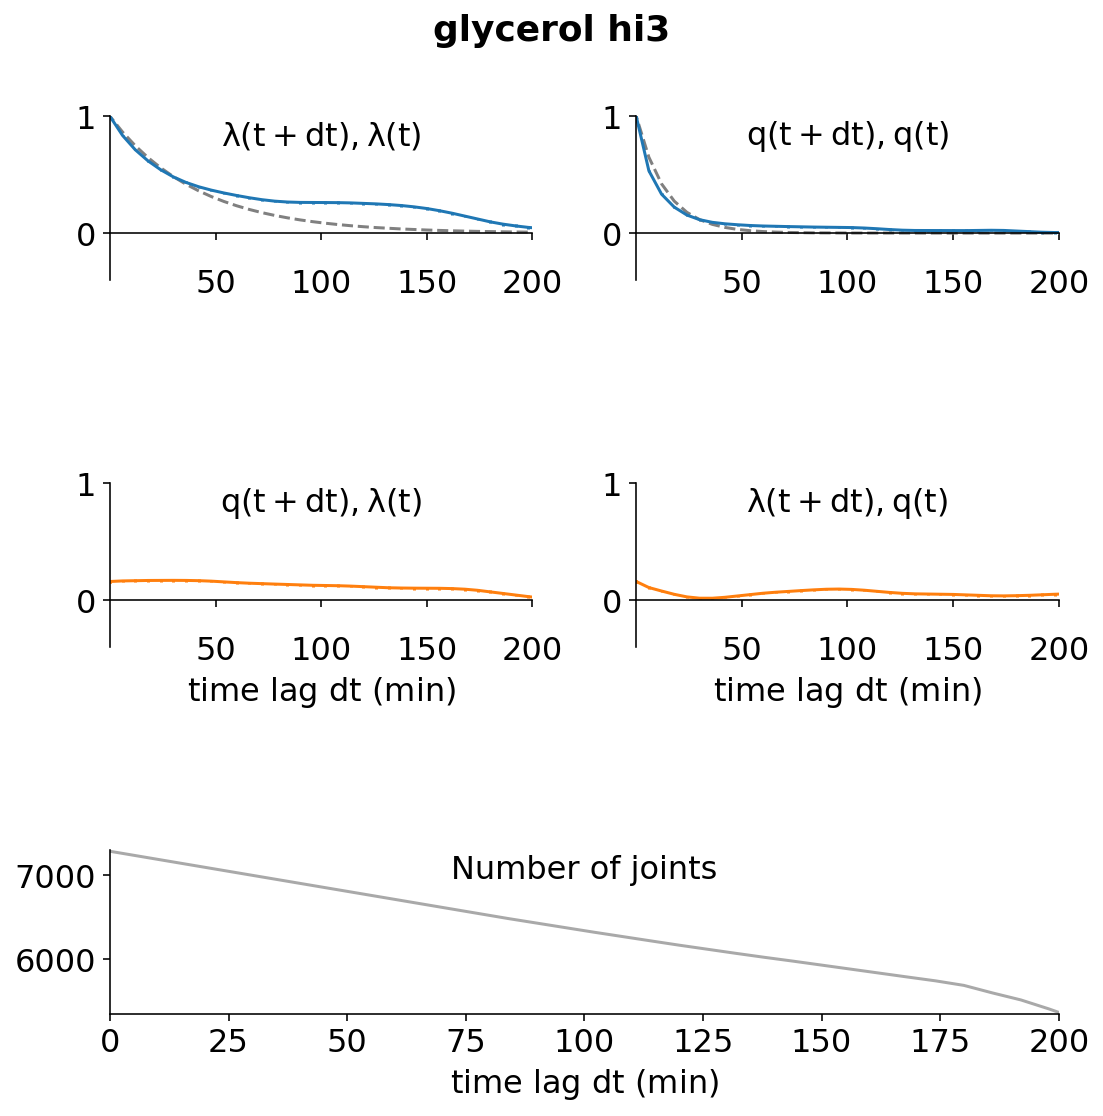

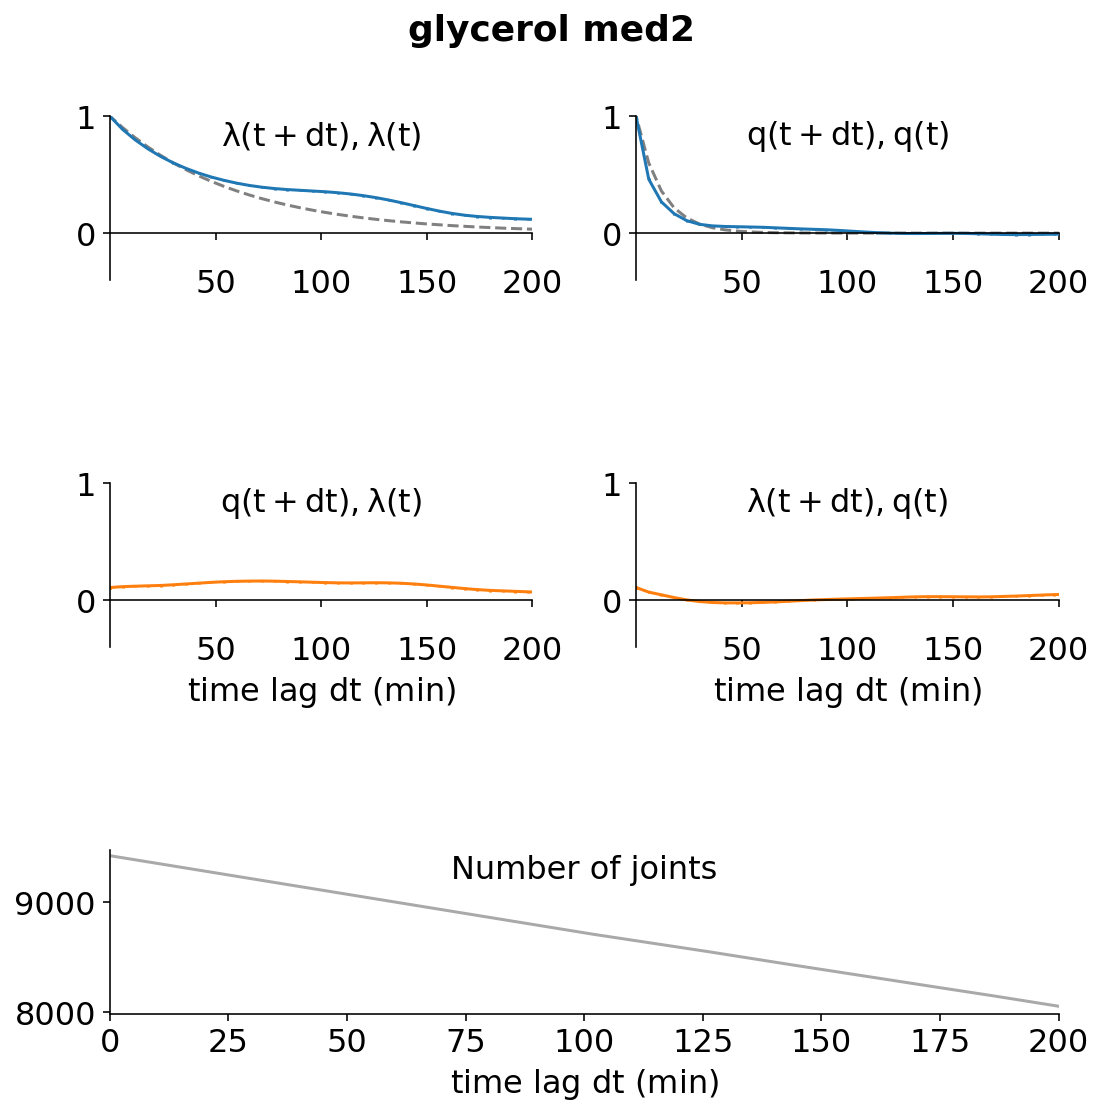

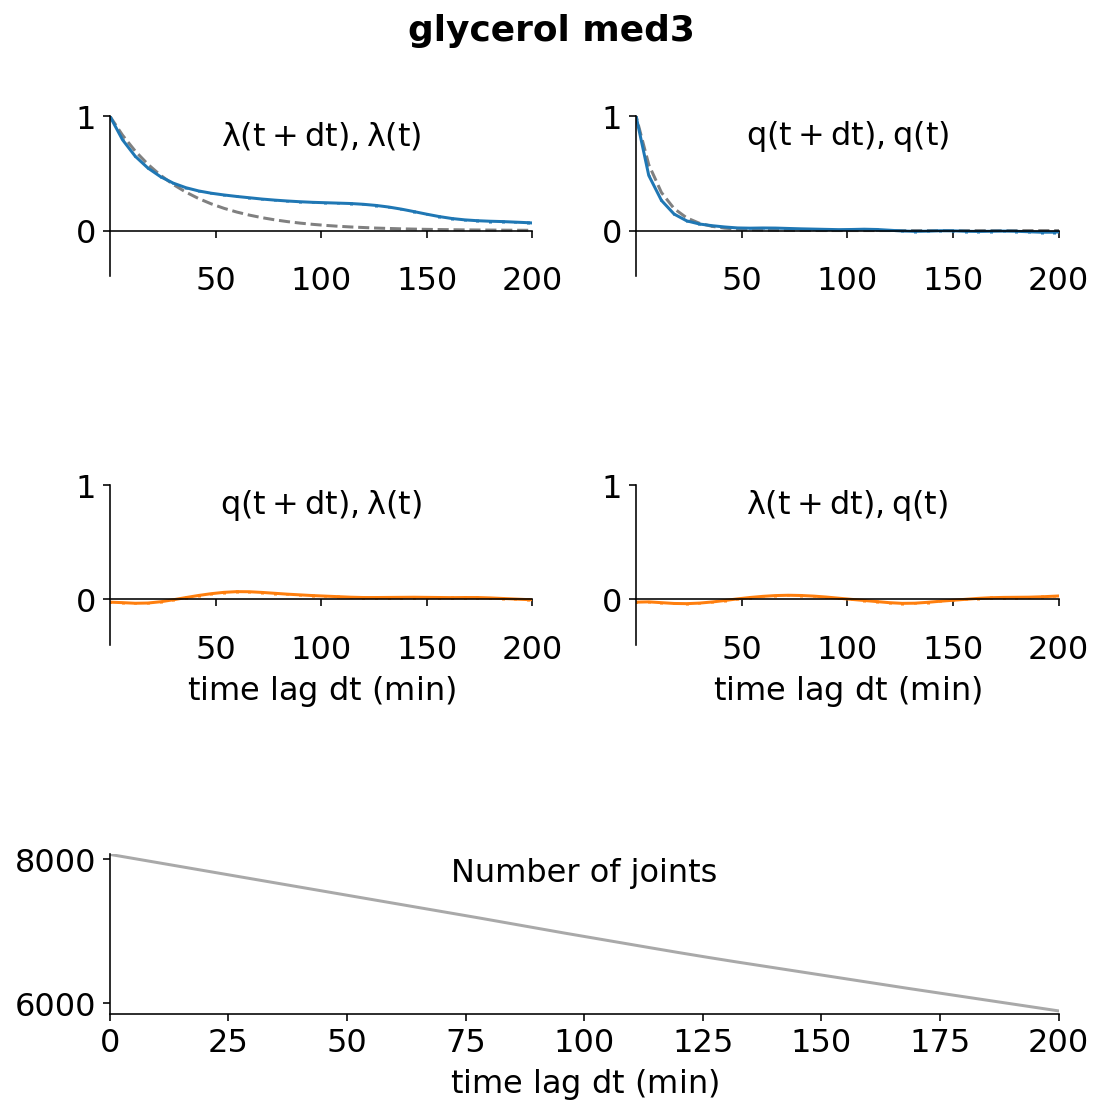

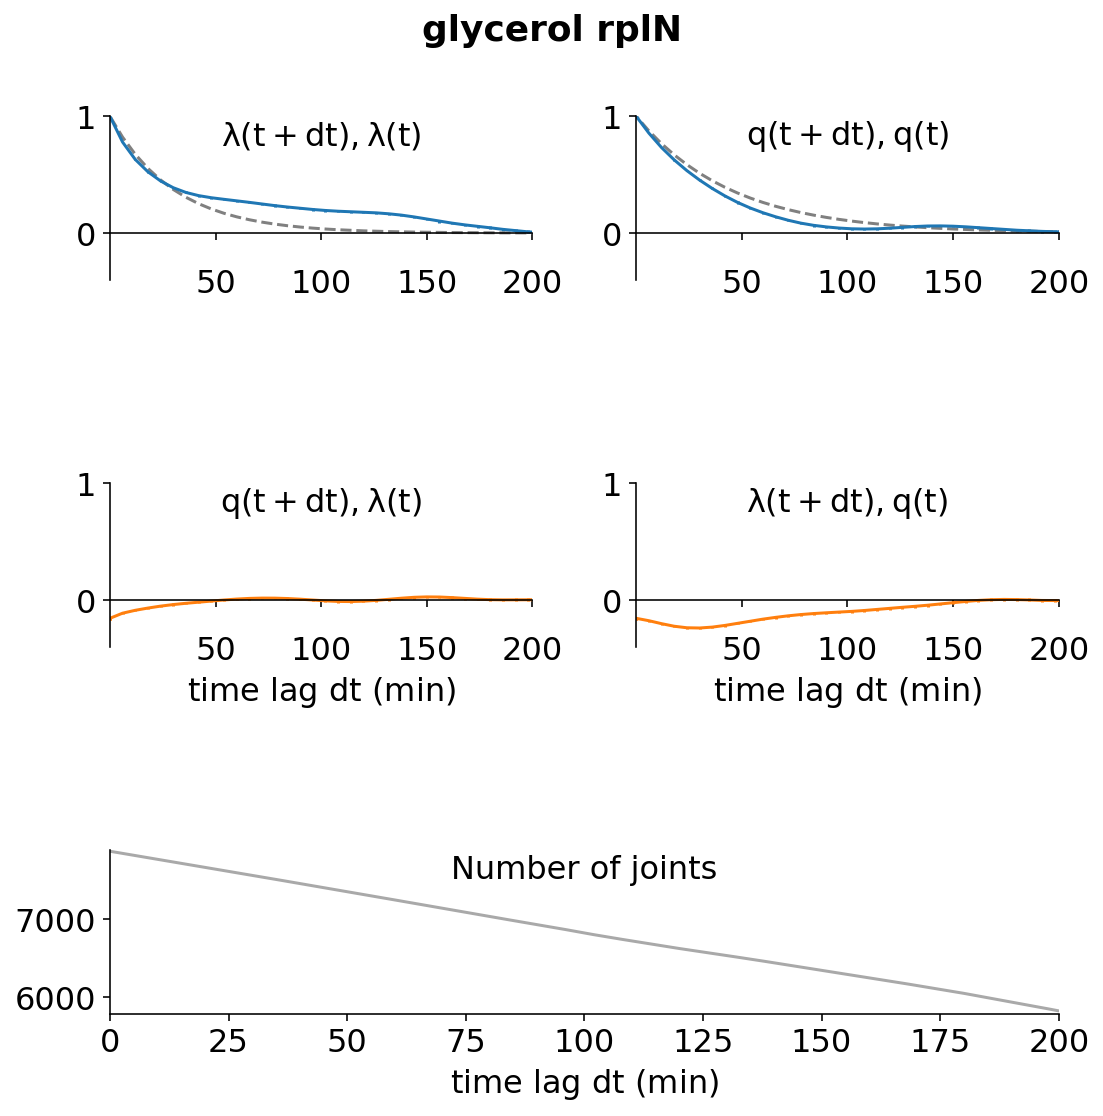

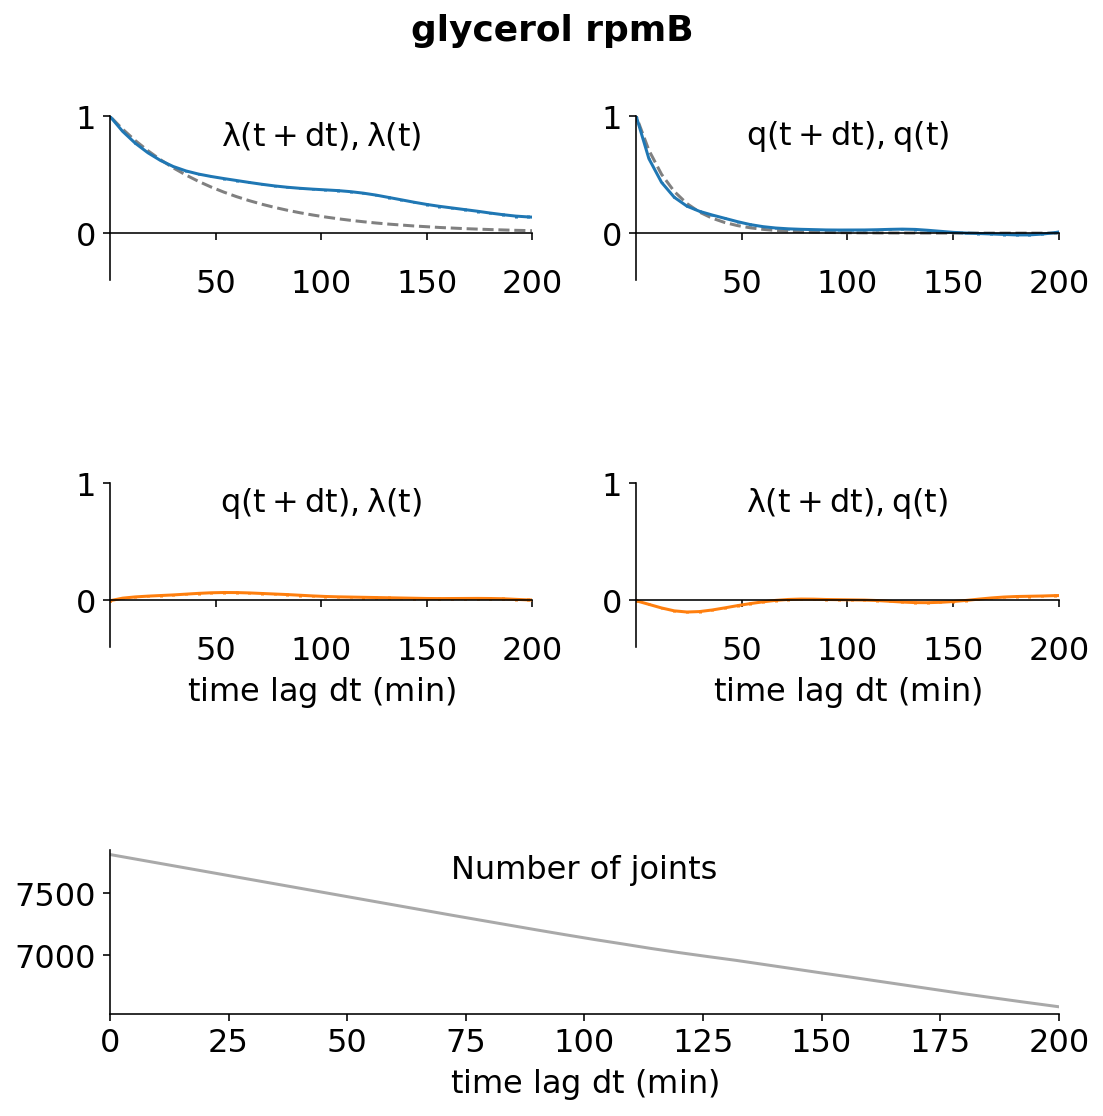

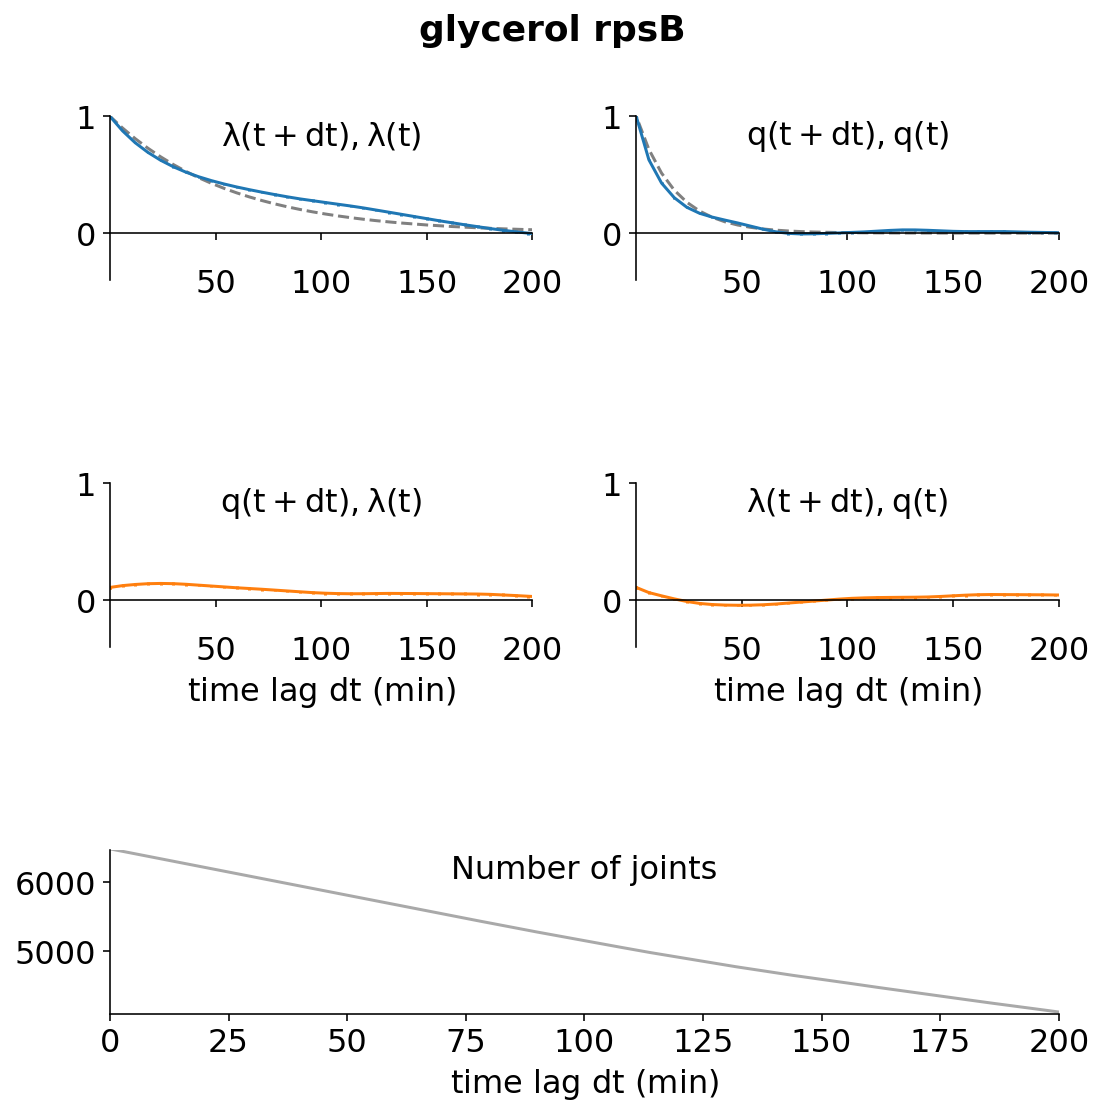

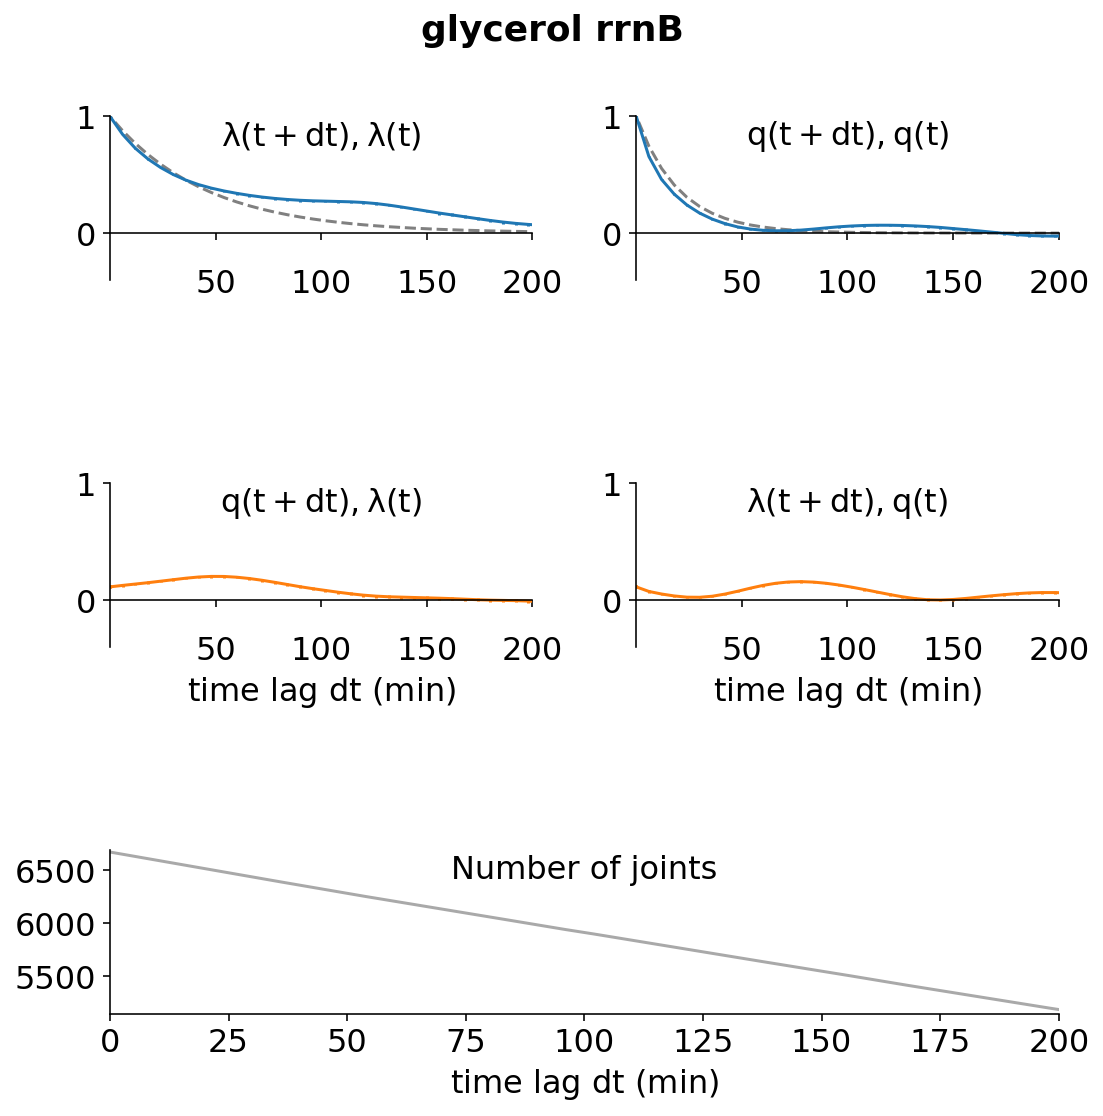

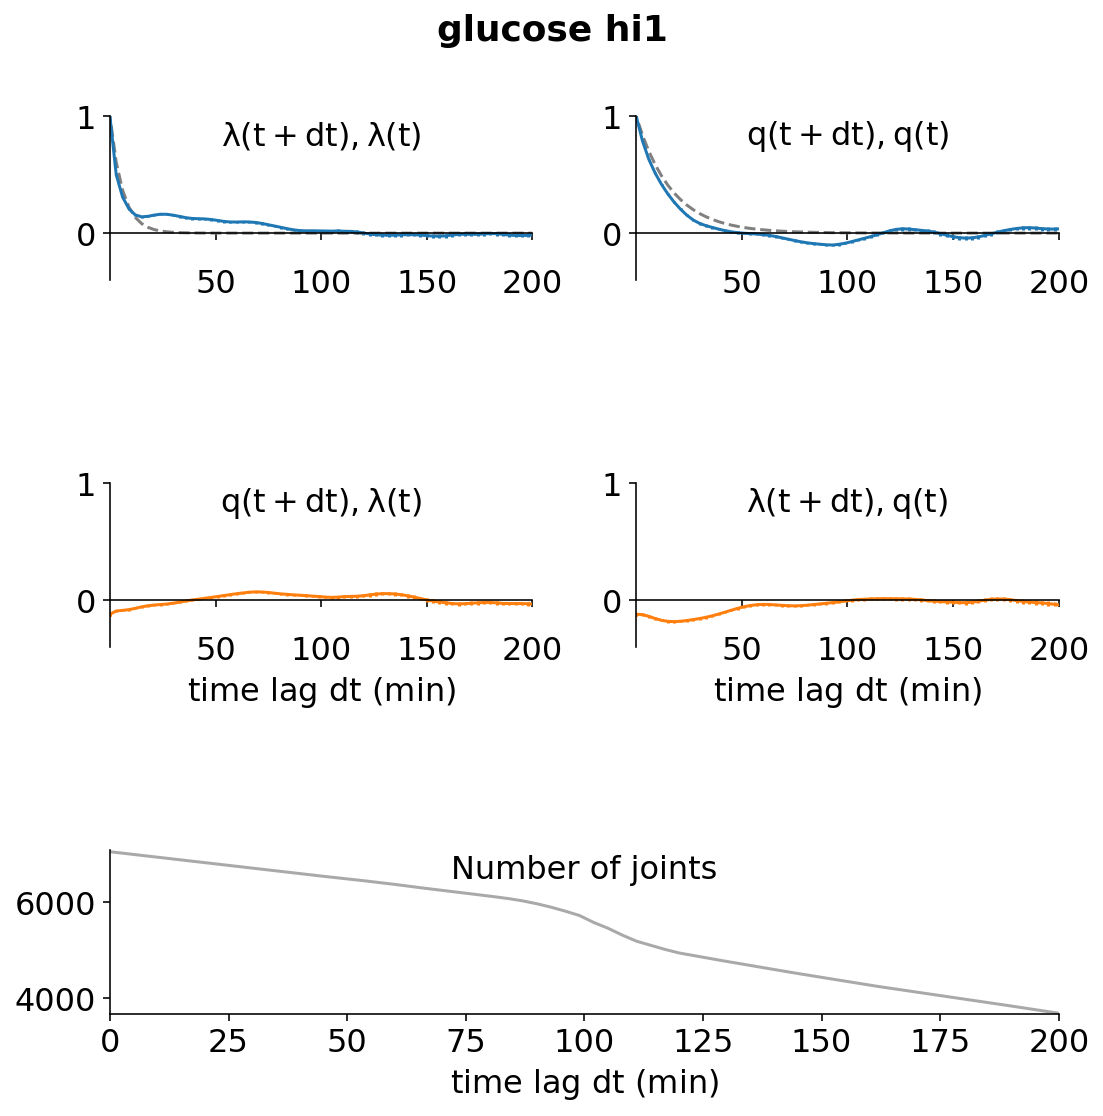

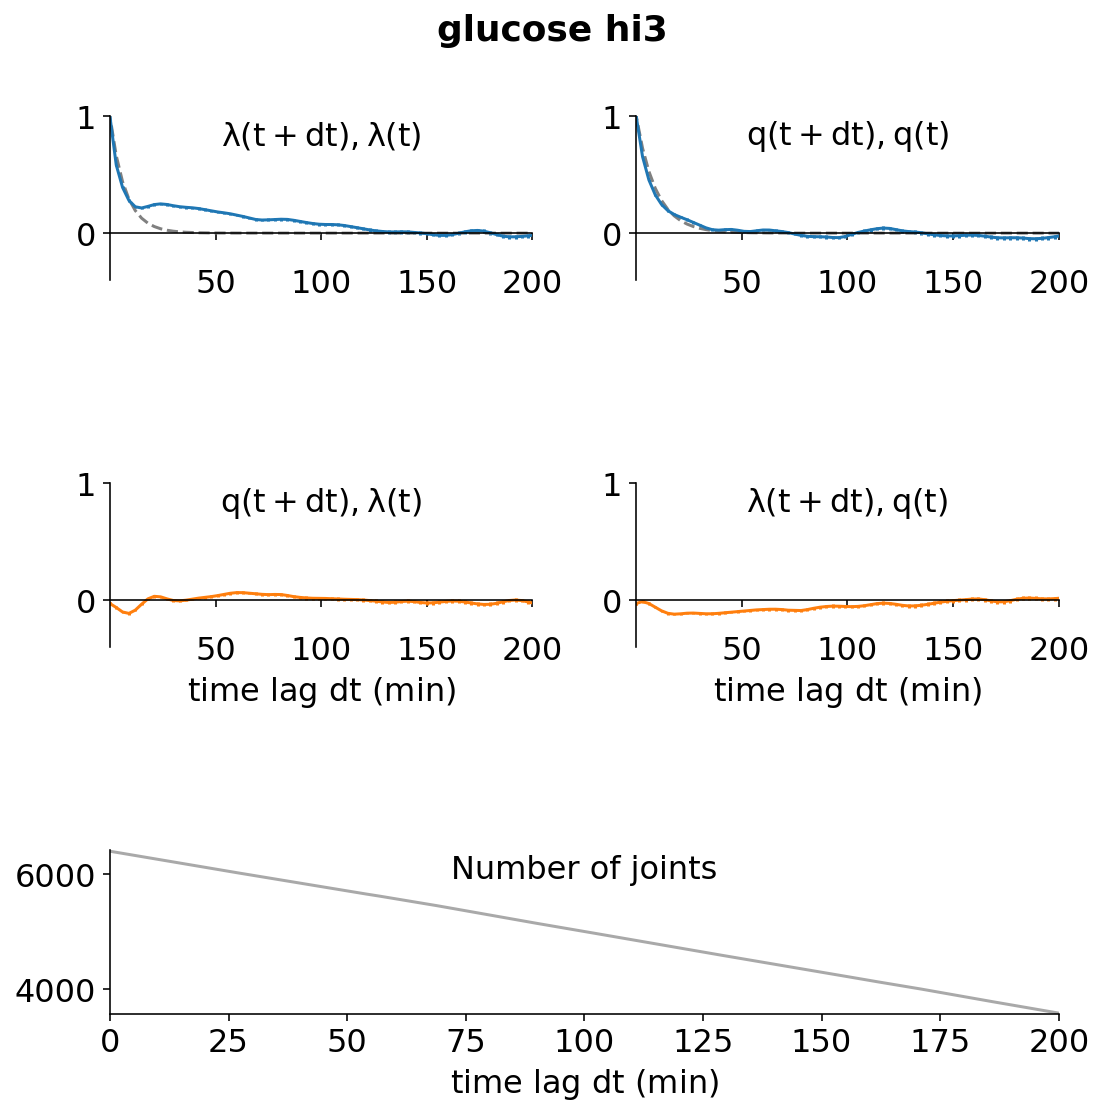

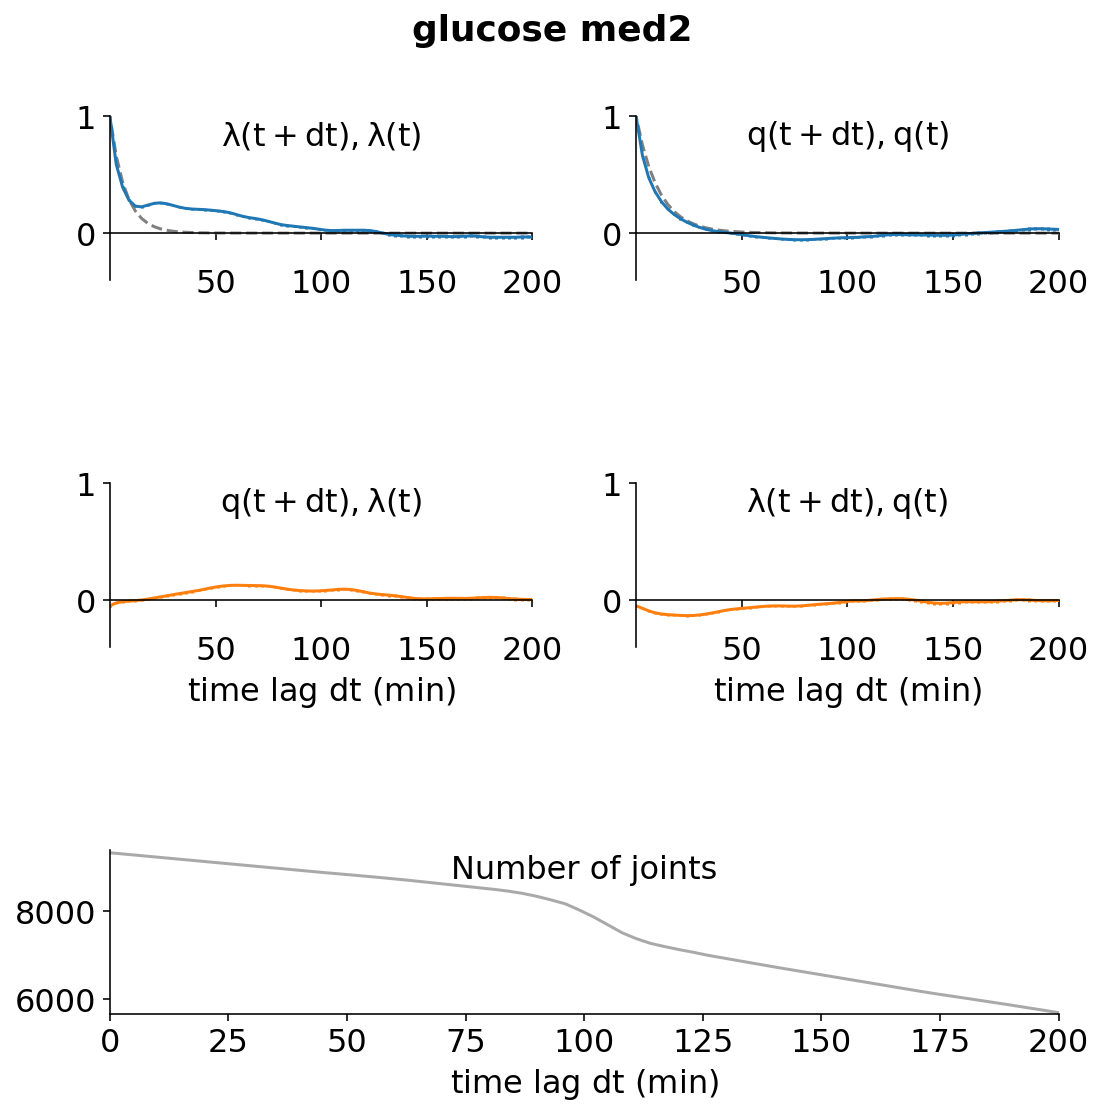

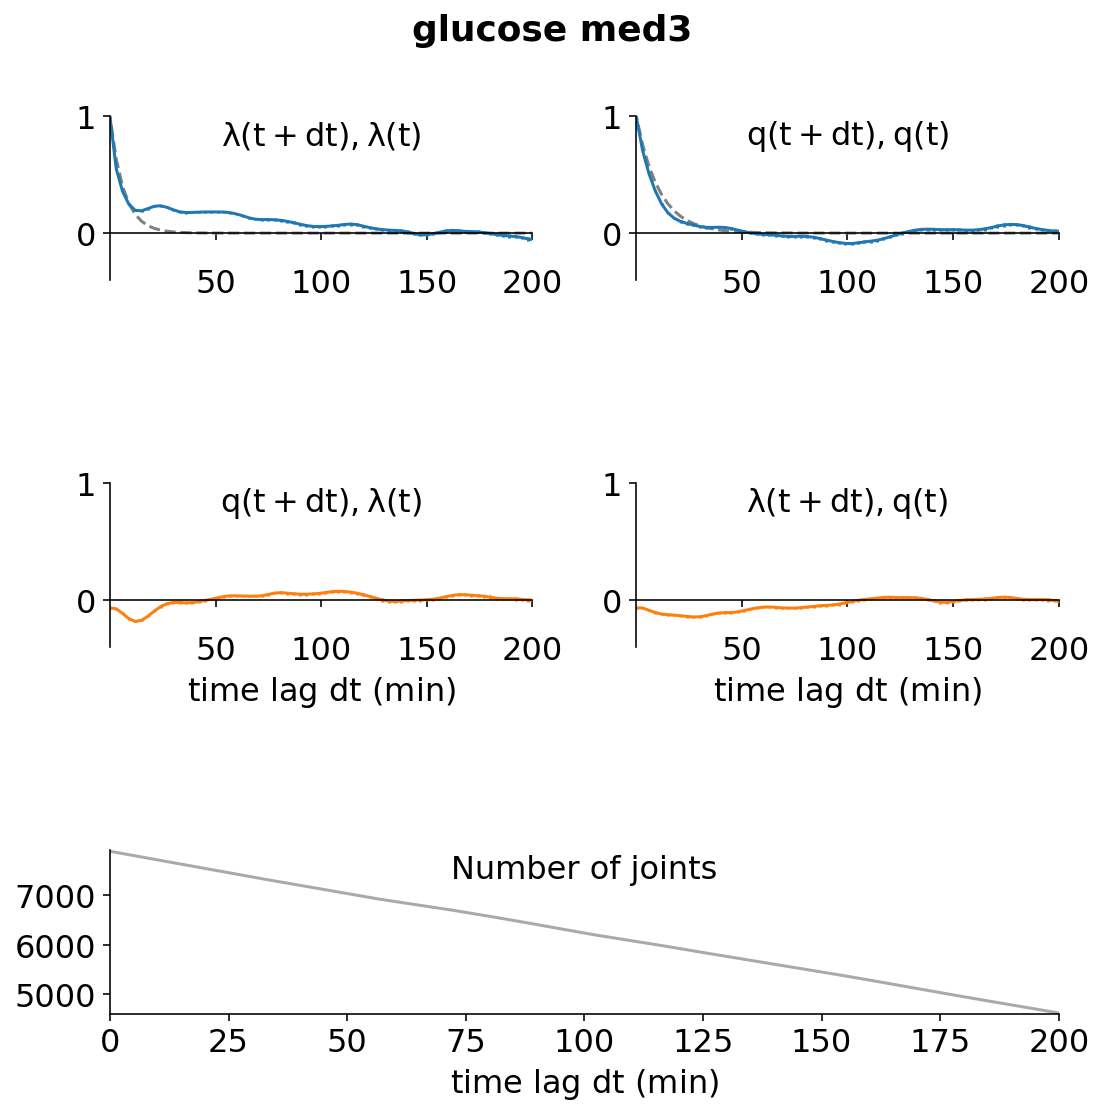

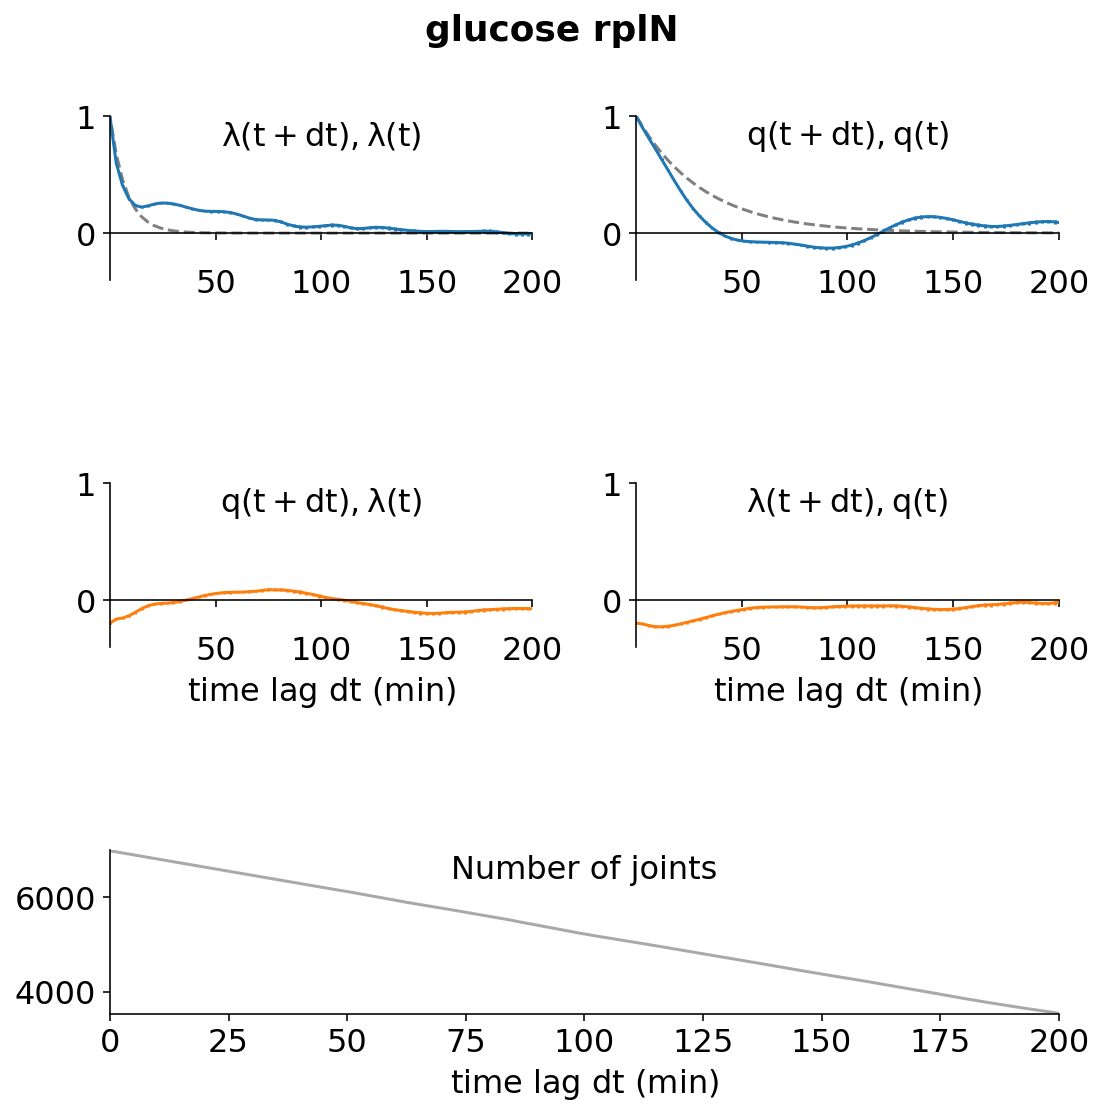

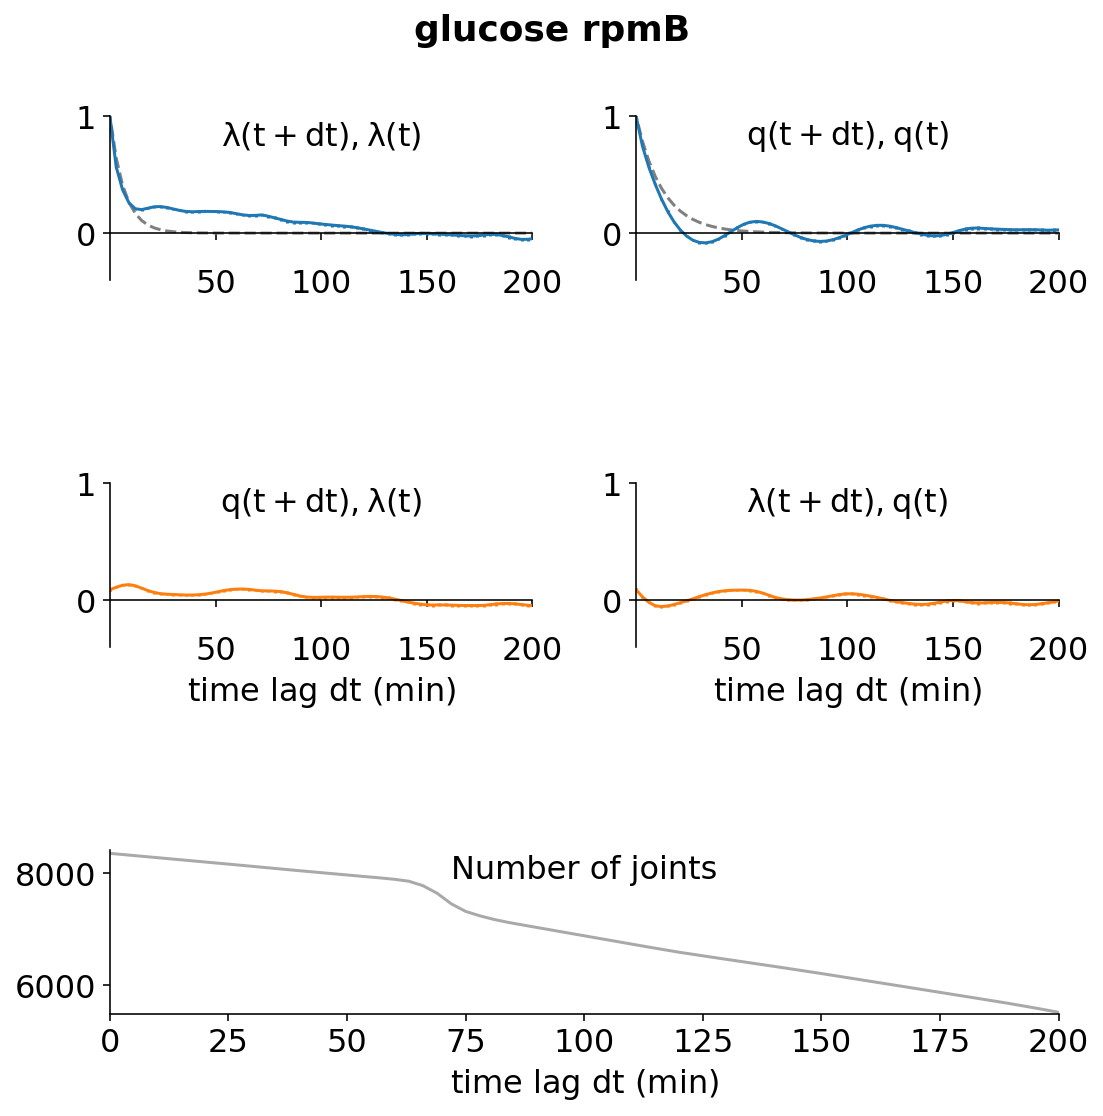

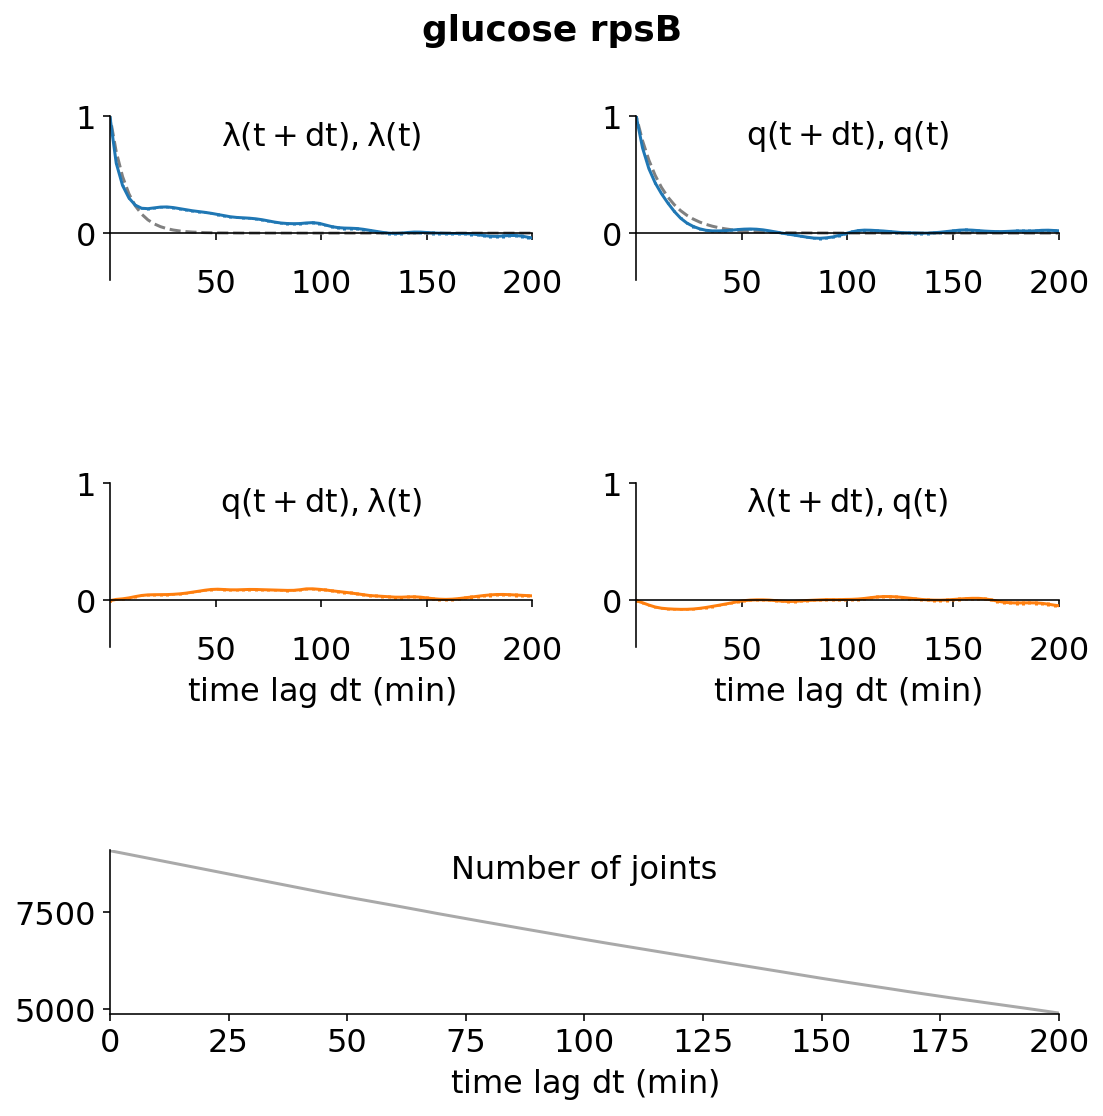

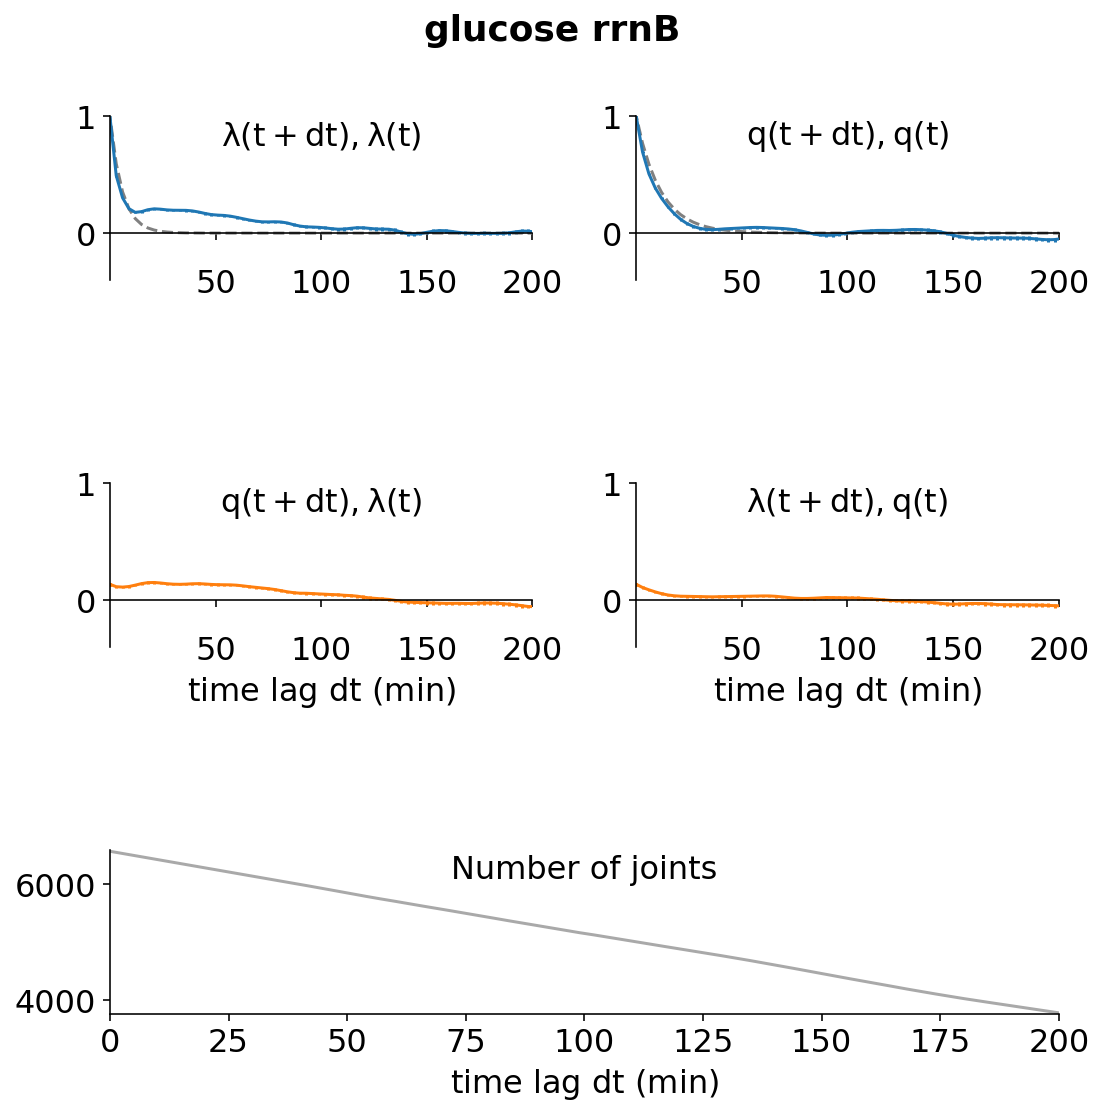

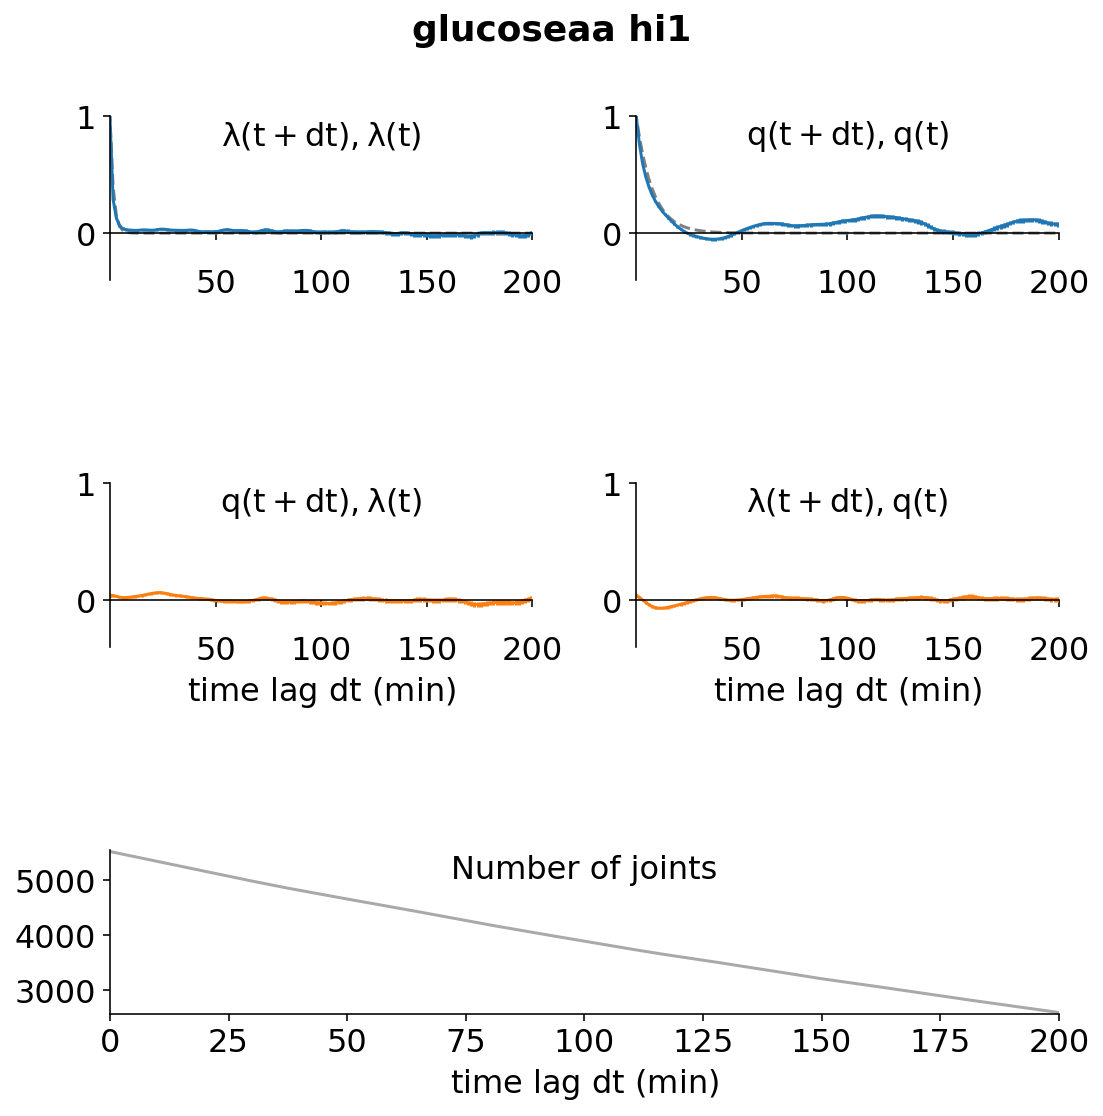

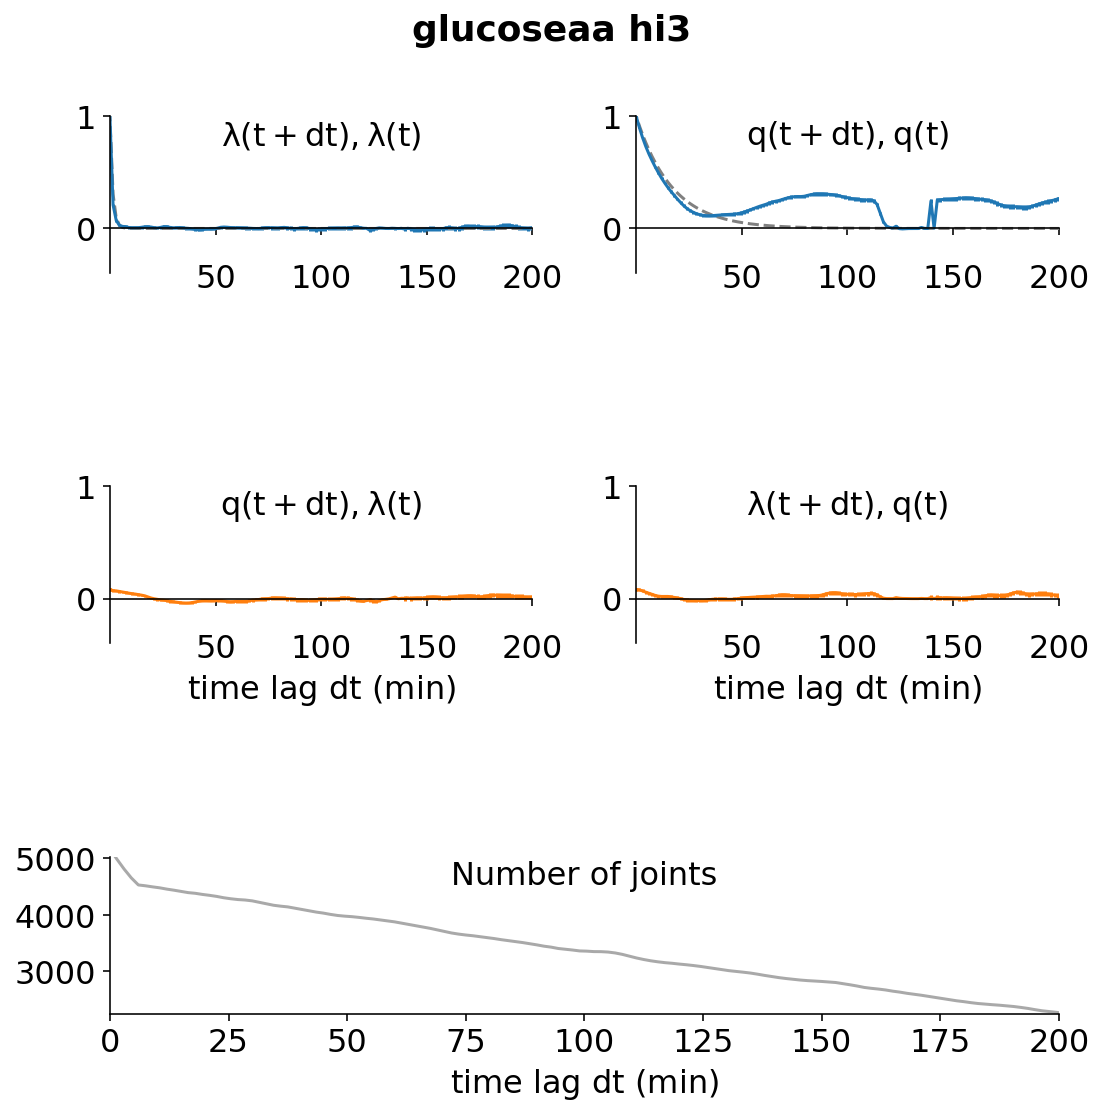

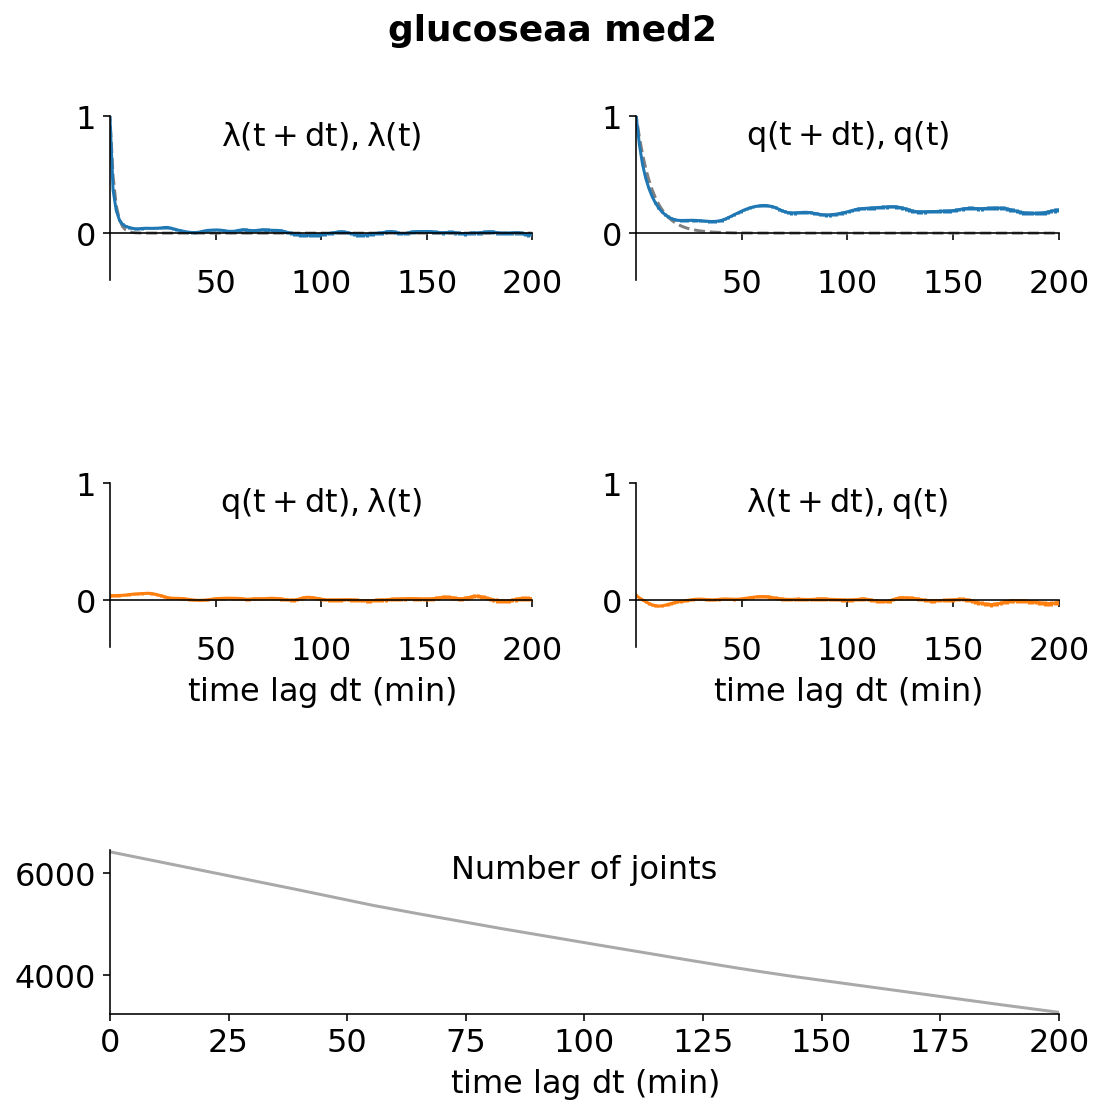

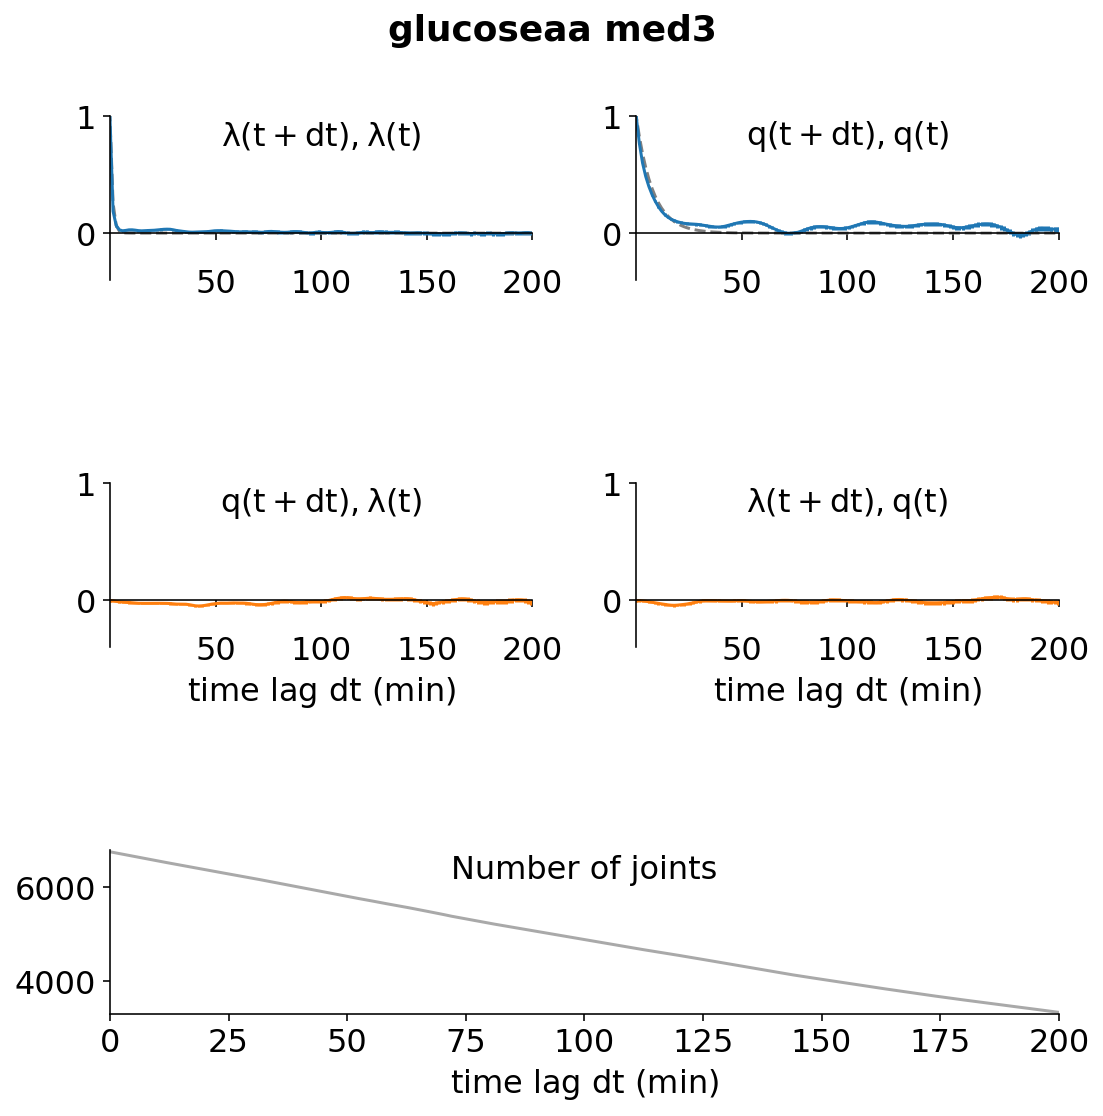

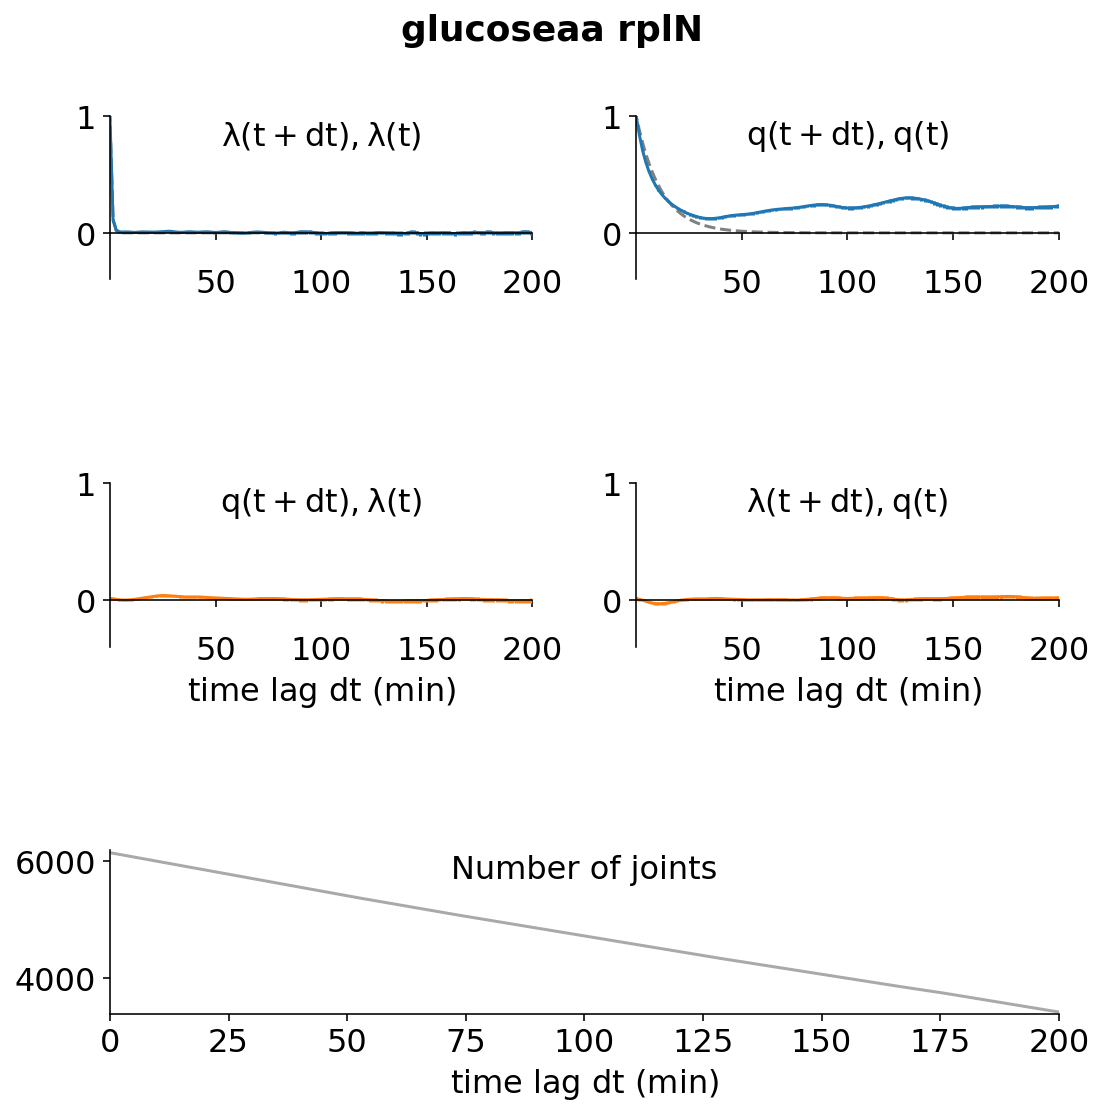

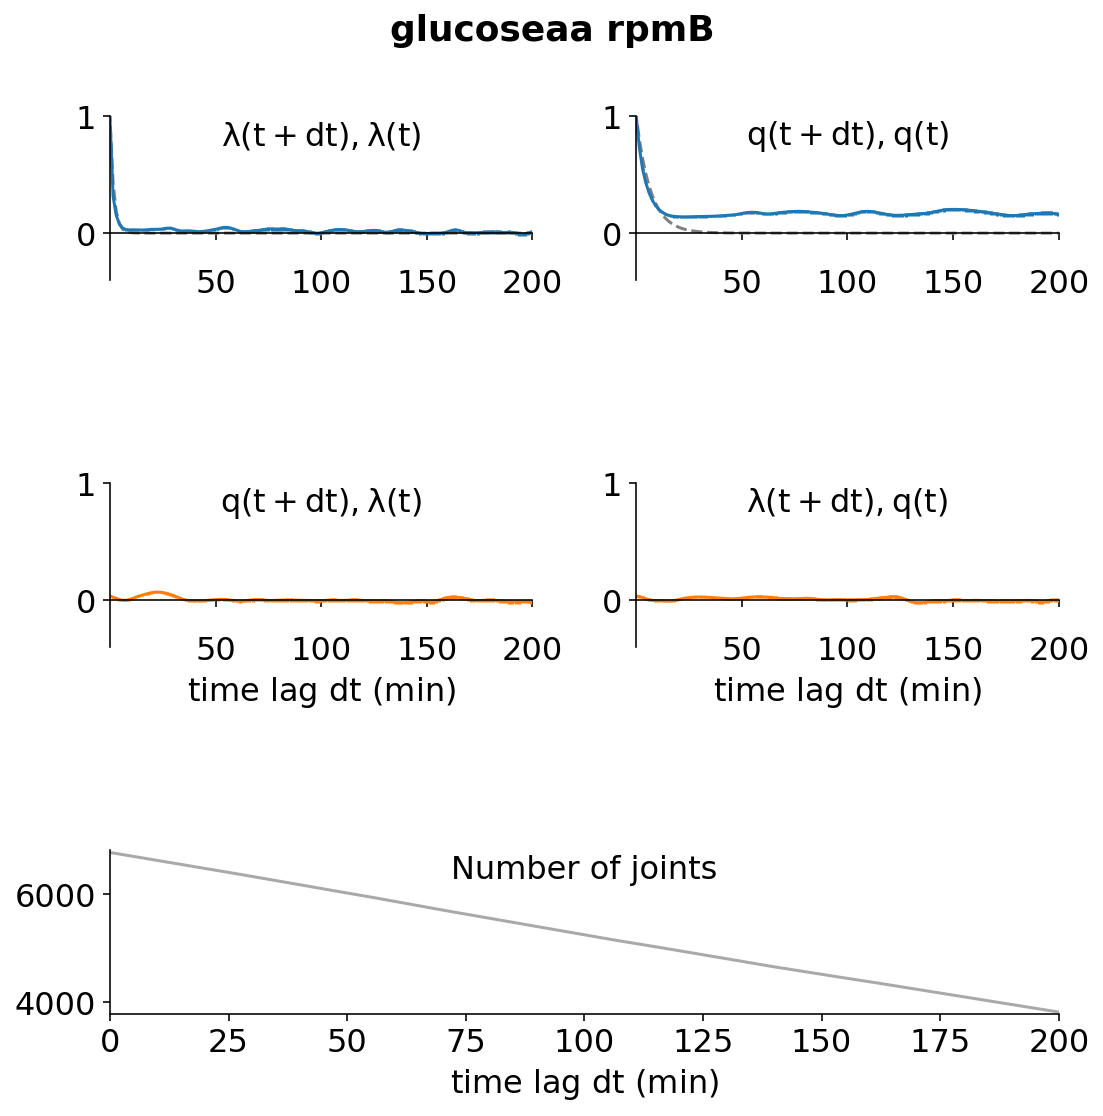

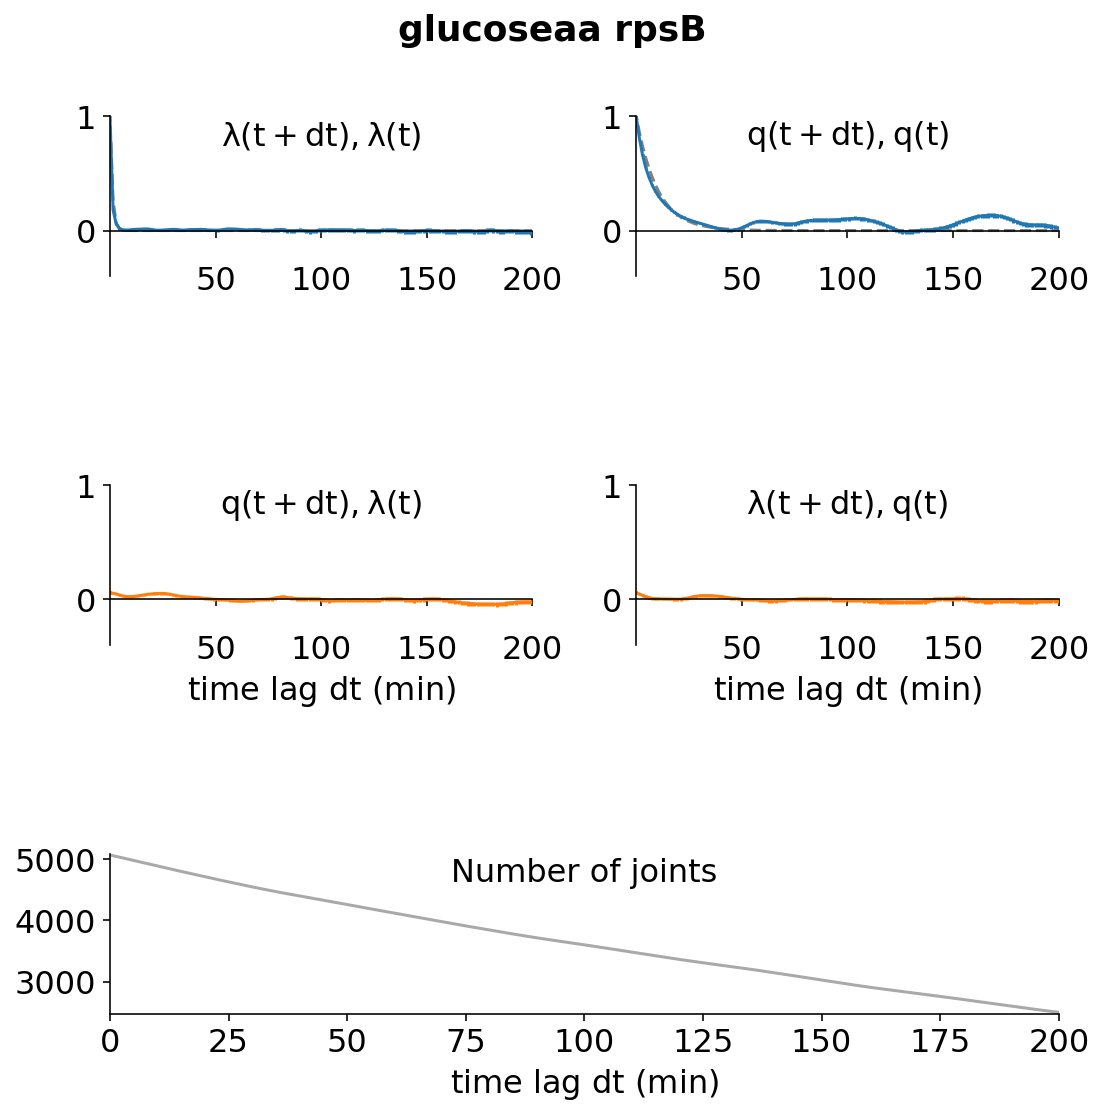

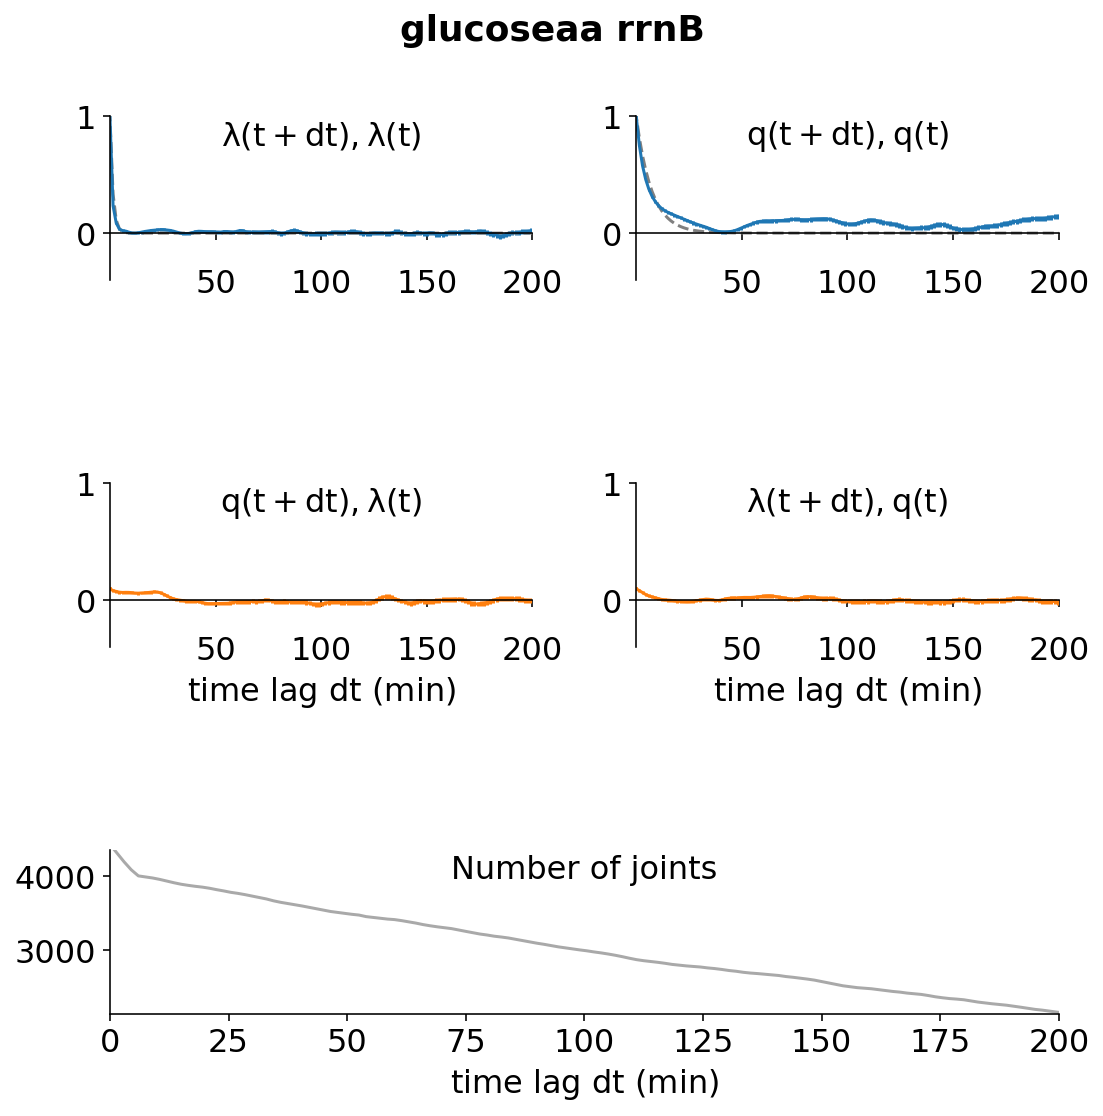

In [17]:
for k in corr_dict.keys():  
    plot_dir = os.path.join(input_dir, "plots/correlations/", "tiles" ,"{:s}_{:s}_{:s}_{:s}.pdf")
    mk_missing_dir( os.path.join(input_dir, "plots/correlations/", "tiles"))
    plot_correlation_tiles(corr_dict[k], 
                            gamma_lambda=gamma_lambdas[k], 
                            gamma_q=gamma_qs[k], 
                            min_joint_number=1500, 
                            xlim=[0,200],
                            title=k, 
                            plot_file=plot_dir.format("corr", k, "tiles", ""))

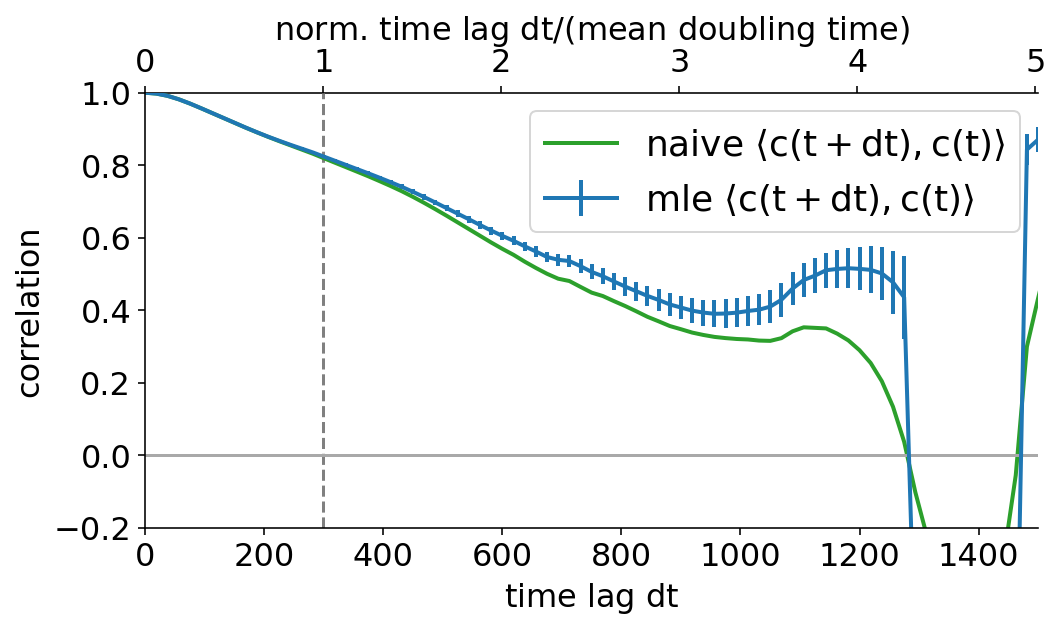

In [18]:
plot_xy_correlation(corr_dict["acetate_hi1"], "c(t+dt)", "c(t)", ylim=[-0.2, 1], xlim=[0, 1500], 
                mean_lambda=mean_lambdas["acetate_hi1"])


In [19]:
dts = np.arange(0, 4, 0.2)

filter = np.where(dts>0.5, True, False) *  np.where(dts<1.5, True, False)

dts[filter]

array([0.6, 0.8, 1. , 1.2, 1.4])